In [3]:
import numpy as np

In [6]:
import cv2 as cv
print(cv.__version__)

4.1.0


In [7]:
import pandas as pd

In [9]:
df = pd.read_csv('machine-learning-june-2019/Dataset/movie_metadata.csv')

In [10]:
type(df)

pandas.core.frame.DataFrame

In [12]:
import numpy as np

In [14]:
df.head(n = 5)

color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi   
1                 40000.0  309404152.0         Action|Adventure|Fantasy   
2                 11000.0  200074175.0        Action|Adventure|Thriller   
3                 27000.0  448130642.0                  Action|Thriller   
4                   131.0          NaN                      Documentary   

          ...          num_user_for_reviews language  country  content_rating  \
0         ...                        3054.0  English      USA           PG-13   
1         ...                        1238.0  English      USA           PG-13   
2         ...                         994.0  English       UK           PG-13   
3         ...                        2701.0  English      USA           PG-13   
4         ...                           NaN      NaN      NaN             NaN   

        budget  title_year actor_2_facebook_likes imdb_score  aspect_ratio  \
0  237000000.0      2009.0                  936.0        7.9          1.78   
1  300000000.0      2007.0                 5000.0        7.1          2.35   
2  245000000.0      2015.0                  393.0        6.8          2.35   
3  250000000.0      2012.0                23000.0        8.5          2.35   
4          NaN         NaN                   12.0        7.1           NaN   

  movie_facebook_likes  
0                33000  
1                    0  
2                85000  
3               164000  
4                    0  

[5 rows x 28 columns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [18]:
df.shape

(5043, 28)

In [19]:
df['movie_title']

0                                                 Avatar 
1               Pirates of the Caribbean: At World's End 
2                                                Spectre 
3                                  The Dark Knight Rises 
4       Star Wars: Episode VII - The Force Awakens    ...
5                                            John Carter 
6                                           Spider-Man 3 
7                                                Tangled 
8                                Avengers: Age of Ultron 
9                 Harry Potter and the Half-Blood Prince 
10                    Batman v Superman: Dawn of Justice 
11                                      Superman Returns 
12                                     Quantum of Solace 
13            Pirates of the Caribbean: Dead Man's Chest 
14                                       The Lone Ranger 
15                                          Man of Steel 
16              The Chronicles of Narnia: Prince Caspian 
17            

In [36]:
df.get(['movie_title'])

movie_title
0                                               Avatar 
1             Pirates of the Caribbean: At World's End 
2                                              Spectre 
3                                The Dark Knight Rises 
4     Star Wars: Episode VII - The Force Awakens    ...
5                                          John Carter 
6                                         Spider-Man 3 
7                                              Tangled 
8                              Avengers: Age of Ultron 
9               Harry Potter and the Half-Blood Prince 
10                  Batman v Superman: Dawn of Justice 
11                                    Superman Returns 
12                                   Quantum of Solace 
13          Pirates of the Caribbean: Dead Man's Chest 
14                                     The Lone Ranger 
15                                        Man of Steel 
16            The Chronicles of Narnia: Prince Caspian 
17                                        The Avengers 
18         Pirates of the Caribbean: On Stranger Tides 
19                                      Men in Black 3 
20           The Hobbit: The Battle of the Five Armies 
21                              The Amazing Spider-Man 
22                                          Robin Hood 
23                 The Hobbit: The Desolation of Smaug 
24                                  The Golden Compass 
25                                           King Kong 
26                                             Titanic 
27                          Captain America: Civil War 
28                                          Battleship 
29                                      Jurassic World 
...                                                 ...
5013                                            Manito 
5014                                           Rampage 
5015                                           Slacker 
5016                                       Dutch Kills 
5017                                         Dry Spell 
5018                                          Flywheel 
5019                                            Exeter 
5020                                        The Ridges 
5021                                   The Puffy Chair 
5022                              Stories of Our Lives 
5023                                  Breaking Upwards 
5024                          All Superheroes Must Die 
5025                                    Pink Flamingos 
5026                                             Clean 
5027                                        The Circle 
5028                                       Tin Can Man 
5029                                          The Cure 
5030                                    On the Downlow 
5031                      Sanctuary; Quite a Conundrum 
5032                                              Bang 
5033                                            Primer 
5034                                            Cavite 
5035                                       El Mariachi 
5036                                   The Mongol King 
5037                                         Newlyweds 
5038                           Signed Sealed Delivered 
5039                         The Following             
5040                              A Plague So Pleasant 
5041                                  Shanghai Calling 
5042                                 My Date with Drew 

[5043 rows x 1 columns]

In [39]:
titles = df.get(['movie_title'])
print(titles)
titles = np.array(titles)

                                            movie_title
0                                               Avatar 
1             Pirates of the Caribbean: At World's End 
2                                              Spectre 
3                                The Dark Knight Rises 
4     Star Wars: Episode VII - The Force Awakens    ...
5                                          John Carter 
6                                         Spider-Man 3 
7                                              Tangled 
8                              Avengers: Age of Ultron 
9               Harry Potter and the Half-Blood Prince 
10                  Batman v Superman: Dawn of Justice 
11                                    Superman Returns 
12                                   Quantum of Solace 
13          Pirates of the Caribbean: Dead Man's Chest 
14                                     The Lone Ranger 
15                                        Man of Steel 
16            The Chronicles of Narnia: Prince C

In [41]:
df.iloc(2)[1]

ValueError: No axis named 2 for object type <class 'pandas.core.frame.DataFrame'>

iloc()[] function takes the row and column as argument 

In [40]:
titles[0][0]

'Avatar\xa0'

In [20]:
len(df['movie_title'][1])

41

In [44]:
dlength = np.array([(len(l)-1) for l in df['movie_title']])

In [45]:
dlength.sort()
print(dlength)

[ 1  1  1 ... 79 83 86]


We have created a numpy array of lengths and sorted them, now we just need to count them add from a dictionary of the frequencies

In [47]:
dfreq = {}
for i in dlength:
    if dfreq.get(i) == None:
        dfreq[i] = 1
    else:
        dfreq[i] = dfreq[i] + 1
print(dfreq)

{1: 5, 2: 8, 3: 35, 4: 91, 5: 139, 6: 138, 7: 226, 8: 267, 9: 294, 10: 328, 11: 330, 12: 306, 13: 274, 14: 284, 15: 264, 16: 239, 17: 219, 18: 213, 19: 176, 20: 138, 21: 138, 22: 109, 23: 85, 24: 82, 25: 74, 26: 69, 27: 51, 28: 65, 29: 36, 30: 47, 31: 43, 32: 21, 33: 31, 34: 30, 35: 21, 36: 18, 37: 24, 38: 13, 39: 14, 40: 17, 41: 14, 42: 8, 43: 9, 44: 4, 45: 7, 46: 4, 47: 4, 48: 4, 49: 3, 50: 5, 52: 2, 53: 2, 54: 3, 55: 1, 56: 1, 58: 2, 59: 1, 62: 1, 66: 1, 68: 1, 71: 1, 79: 1, 83: 1, 86: 1}


In [48]:
print(type(dlength))

<class 'numpy.ndarray'>


In [49]:
dname = np.array(df['movie_title'])

In [50]:
print(type(dname))

<class 'numpy.ndarray'>


In [56]:
import matplotlib.pyplot as plt

Text(0.5,0,'Length of Movie title')

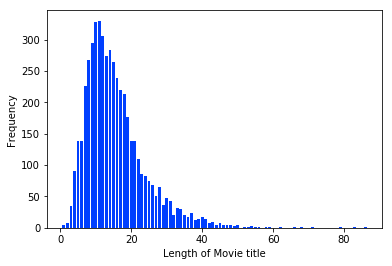

In [62]:
plt.bar(dfreq.keys(),dfreq.values())
plt.ylabel('Frequency')
plt.xlabel('Length of Movie title')
#plt.show()

In [57]:
plt.style.available

['seaborn-talk',
 'seaborn-colorblind',
 'seaborn-whitegrid',
 'seaborn-poster',
 'seaborn-deep',
 'seaborn-paper',
 'tableau-colorblind10',
 'bmh',
 'seaborn-bright',
 'seaborn-darkgrid',
 'seaborn-muted',
 'grayscale',
 'seaborn-notebook',
 'classic',
 'seaborn-pastel',
 'seaborn-ticks',
 'fast',
 'dark_background',
 'seaborn-dark-palette',
 '_classic_test',
 'Solarize_Light2',
 'seaborn-dark',
 'seaborn',
 'ggplot',
 'fivethirtyeight',
 'seaborn-white']

In [65]:
#Alternates 
x = list(sorted(dfreq.keys()))
print(x)
y = [dfreq[key] for key in x]
print(y)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56, 58, 59, 62, 66, 68, 71, 79, 83, 86]
[5, 8, 35, 91, 139, 138, 226, 267, 294, 328, 330, 306, 274, 284, 264, 239, 219, 213, 176, 138, 138, 109, 85, 82, 74, 69, 51, 65, 36, 47, 43, 21, 31, 30, 21, 18, 24, 13, 14, 17, 14, 8, 9, 4, 7, 4, 4, 4, 3, 5, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1]


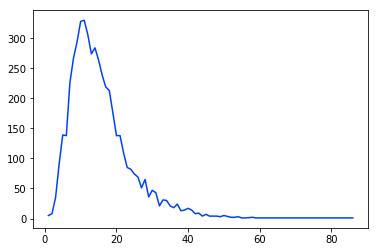

In [68]:
plt.plot(x,y)
plt.show()

In [69]:
np.mean(y)

78.796875

In [70]:
#Alternative to mean
np.sum(y)/

SyntaxError: invalid syntax (<ipython-input-70-02bbee7946a1>, line 2)

In [71]:
np.sum(dfreq.values())

dict_values([5, 8, 35, 91, 139, 138, 226, 267, 294, 328, 330, 306, 274, 284, 264, 239, 219, 213, 176, 138, 138, 109, 85, 82, 74, 69, 51, 65, 36, 47, 43, 21, 31, 30, 21, 18, 24, 13, 14, 17, 14, 8, 9, 4, 7, 4, 4, 4, 3, 5, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [81]:
len_sum = 0
for i in dlength:
    len_sum += i
print(len_sum)
mean = len_sum/titles.shape[0]
print(mean)

78417
15.549672813801308


In [76]:
total_len = 0
for t in range(titles.shape[0]):
    total_len += len(titles[t][0]) -1

mean_len = total_len/titles.shape[0]
print(mean_len)

15.549672813801308


In [77]:
print(titles.shape[0])

5043


***

# Standard Distribution

In [84]:
import numpy as np 
import matplotlib.pyplot as plt

In [100]:
#Creates a matrx of 1000 elements 
arr = np.random.randn(1000)

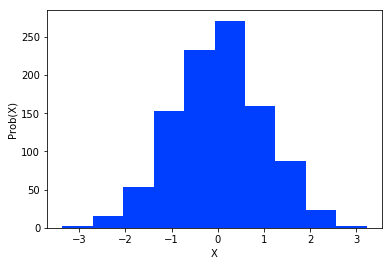

In [106]:
plt.hist(arr,bins = 10)
plt.xlabel("X")
plt.ylabel("Prob(X)")
plt.show()

The main purpose of this is used to create a random dataset that fulfills some of the criteria/conditions

In [104]:
#Mean is lose to zero 
np.mean(arr)

0.03358605859707657

In [105]:
#Standard deviation is close to 1
np.std(arr)

0.9825294317226955

In [114]:
# For creating a normal distirbition random datavset such thatthe mean is 60 and values vary +10 to -10
# Multplication is used to change the spread, i.e. the standard deivation
# Summation is used for shifting the graph, ie,towards the mean

marks = np.random.randn(1000)*10 + 60 
#print(marks)

In [115]:
np.mean(marks)

60.45497746125911

# N(0,1) = (x - mean)/standard deviation 

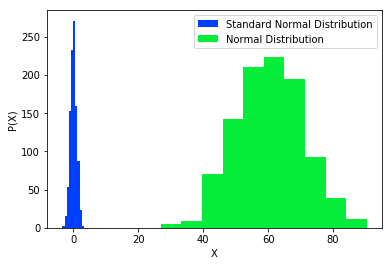

In [118]:
plt.hist(arr,bins = 10, label = 'Standard Normal Distribution')
plt.hist(marks, bins = 10, label = 'Normal Distribution')
plt.legend()
plt.xlabel('X')
plt.ylabel('P(X)')
plt.show()

# Multivariate Normal Distribution
***
 A distribution that has more than one parameter . It is the generalization of Gaussian Distribution to higher dimensions

In [137]:
apples_data = np.random.multivariate_normal(mean = [5,7], cov = [[3,0.5],[0.5,1.2]],size = 1000)
oranges_data = np.random.multivariate_normal(mean =[10,12], cov = [[2,-0.5],[-0.5,1]], size = 1000)

In [138]:
print(apples_data[:5,:])
print(oranges_data[:5, :])

[[2.78375363 5.87599526]
 [4.78242928 7.33992782]
 [4.74748443 7.81932741]
 [6.31818076 4.88634899]
 [5.04906446 7.6680816 ]]
[[ 8.11766988 12.45874267]
 [10.88855198 12.60832713]
 [12.33005267 10.91987932]
 [10.79128531 12.55359351]
 [ 9.88029765 11.53087407]]


In [141]:
np.mean(apples_data[0])
#Mean of sweetness

4.3298744420426205

In [142]:
np.mean(apples_data[1])
#Mean of nutrition

6.06117854822396

In [139]:
np.mean(oranges_data[0])
#Mean of sweetness

10.288206275754613

In [140]:
np.mean(oranges_data[1])
#Mean of nutrition

11.748439552344982

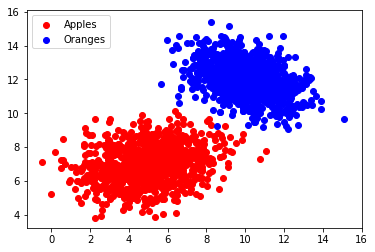

In [148]:
plt.scatter(apples_data[:,0],apples_data[:,1] ,color = 'red', label = 'Apples')
plt.scatter(oranges_data[:,0],oranges_data[:,1], color = 'blue', label = 'Oranges')
plt.legend()
plt.show()

NOTE: Apples have a positove covariance so the density cloud has an upward slope. On the other hand, oranges have a negative slope due to negative covariance

Y-Axis is sweetness and X-Axis is nutrition. We plot the different types(oranges,apples) using their dimensions (sweetness, nutrition) as axes.

In such a scenario we can differentiate between apples and oranges if we are given their sweetness and nutritive values.
We will predict it using K-Nearest Neighbours method 

# K Nearest Neighbours Method

### Data Preparation

In [157]:
#Creating an empty data matrix
total_fruits = apples_data.shape[0] + oranges_data.shape[0]
print(total_fruits)
X = np.zeros((total_fruits,3))
#print(X)
print(X.shape)

2000
(2000, 3)


In [159]:
X[:1000,:-1] = apples_data
X[1000:,:-1] = oranges_data
X[1000:,-1] = 1 
print(X)

[[ 2.78375363  5.87599526  0.        ]
 [ 4.78242928  7.33992782  0.        ]
 [ 4.74748443  7.81932741  0.        ]
 ...
 [ 7.42999801 10.96980552  1.        ]
 [10.21413072 11.7448438   1.        ]
 [10.9842689  12.38048946  1.        ]]


In [151]:
#Combining the data
#data_matrix = np.vstack((apples_data,oranges_data))

In [165]:
X_values = X[:,:-1] # All values except that of last column
Y_values = X[:,-1] # All values of last column 
print(X_values)
print(Y_values)
print(X_values.shape) 
print(Y_values.shape)

[[ 2.78375363  5.87599526]
 [ 4.78242928  7.33992782]
 [ 4.74748443  7.81932741]
 ...
 [ 7.42999801 10.96980552]
 [10.21413072 11.7448438 ]
 [10.9842689  12.38048946]]
[0. 0. 0. ... 1. 1. 1.]
(2000, 2)
(2000,)


In [278]:
test_fruit = np.array([3,12]) 

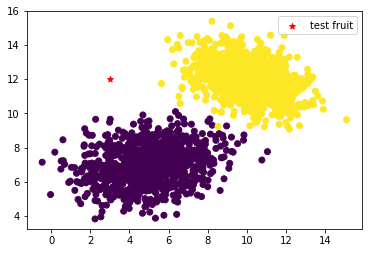

In [279]:
plt.scatter(test_fruit[0], test_fruit[1], color ='red', marker = '*', label = "test fruit")
plt.scatter(X_values[:,0],X_values[:,1], c = Y_values)
# c gives a sequence as it has the two labels 0 and 1 for apples and oranges
plt.legend();
plt.show()

In [247]:
def distance(p1,p2):
#p1 = np.array([1,2])
#p2 = np.array([3,4])
     return (np.sum((p2 - p1)**2))**.5

In [276]:
def knn(X,Y,test,k = 5):
    m = X.shape[0]
    d = []
    
    for i in range(m):
        dist = distance(test, X[i])
        d.append((dist,Y[i]))
        
    #d = d.sort()    
    #d = np.array(sorted(d))
    d = np.array(sorted(d))[:,1]
    #print(d[:5])
    print(d.shape)
    t = np.unique(d[:k],return_counts = True)
    print(t)
    idx = np.argmax(t[1])
    print(idx)
    prediction = int(t[0][idx])
    #prediction = idx
    if prediction == 0:
        return 'Apple'
    else:
        return 'Orange'

In [280]:
knn(X_values,Y_values,test_fruit)

(2000,)
(array([0., 1.]), array([4, 1]))
0


'Apple'

In [269]:
arry = np.array([1,2,2,4,28,8])
print(np.argmax(arry)) # gives the index at which the value is maximum
print(np.unique(arry,return_counts = True)) # gives he frequency of each value

4
(array([ 1,  2,  4,  8, 28]), array([1, 2, 1, 1, 1]))


In [197]:
print(np.unique(prediction, return_counts = True))

(array([None], dtype=object), array([1]))


In [283]:
tarr = np.array([0,0,0,0,0,0,0,0,0])
a1 = np.unique(tarr,return_counts = True)
print(a1)
print(a1[1])
a2 = np.argmax(a1[1])
print(a2)
print(int(a1[0][a2]))


(array([0]), array([9]))
[9]
0
0


# MNIST Dataset

In [285]:
import pandas as pd

In [287]:
df = pd.read_csv('machine-learning-june-2019/Dataset/MNIST/train.csv')

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [290]:
df.head(n = 5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [291]:
df.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [289]:
data = df.values
print(data.shape)

(42000, 785)


In [331]:
X = data[:,1:] # Pixel value Matrix
Y = data[:,0]  # Label matrix
print(X.shape)
print(Y.shape)
print(type(X))

(42000, 784)
(42000,)
<class 'numpy.ndarray'>


In [293]:
import matplotlib.pyplot as plt

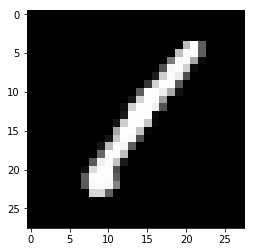

In [294]:
plt.imshow(X[0].reshape(28,28), cmap = 'gray')
plt.show()

In [295]:
def drawing (img,label,i):
    plt.subplot(2,5,i)
    plt.title("Label "+str(label))
    plt.imshow(img.reshape((28,28)),cmap='gray')

In [376]:
print(Y[:10]) 
print(type(Y))

[1 0 1 4 0 0 7 3 5 3]
<class 'numpy.ndarray'>


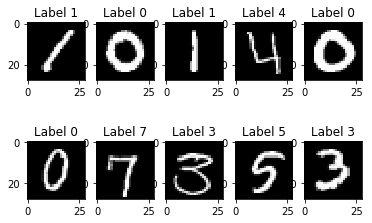

In [298]:
for i in range(10):
    drawing(X[i], Y[i], i+1)
plt.show()    

In [361]:
#np.mean(X[0])
print(X.shape)

(42000, 784)


### Correct Method:
##### With a bit of hint from my friend

The oranges and apples had 2 dimensions. So this MNIST has 784 dimensions for each digit

1. So we will create an empty (784 + label_column) X (no. of rows) matrix
2. We cannot plot it using matplotlib, so we skip to step 3
3. Use the distance function but now on 784 dimensions
4. 


In [697]:
z_matrix = np.zeros((42000,784))
z_matrix = X * 1 #Mulitplying with 1 to avoid referencing

In [ ]:
testdf = pd.read_csv('machine-learning-june-2019/Dataset/MNIST/test.csv')

In [699]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [700]:
testdf.head(4)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  

[4 rows x 784 columns]

In [701]:
tdf = np.array(testdf.values)
print(type(tdf))
print(tdf[0].shape)
print(tdf[:,0].shape)
print(tdf[0][1])

<class 'numpy.ndarray'>
(784,)
(28000,)
0


In [698]:
def mnist_distance(arr1,arr2):
#p1 = np.array([1,2])
#p2 = np.array([3,4])
     return (np.sum((arr2 - arr1)**2))**.5

In [723]:
def mnist_knn(X,Y,test,k = 7):
    #We will find the min distances, rank them with the least and then check them with their labels
    m = X.shape[0]
    d = []
    
    for i in range(m):
        dist = mnist_distance(test, X[i])
        d.append((dist,Y[i]))
        
    d = np.array(sorted(d))[:,1] #Sorting and then containing only Y[i] ,i.e. the labels
    
    # d now has the most less distanced labels
    #print(d[:k])
    
    t = np.unique(d[:k], return_counts = True)
    print(t)
    
    idx = np.argmax(t[1]) #The index of the highest freq,i.e. the number of times a label is repeated
    #print(idx)
    
    prediction = int(t[0][idx]) #Gives the value in t present at index idx
    
    return prediction

In [708]:
print(tdf[1].shape)

(784,)


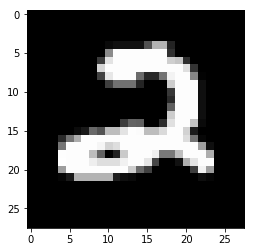

(array([2.]), array([7]))
2


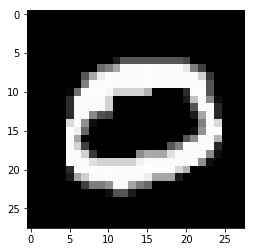

(array([0.]), array([7]))
0


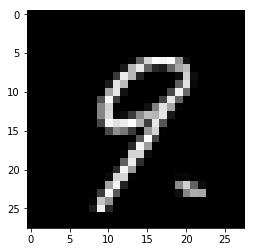

(array([9.]), array([7]))
9


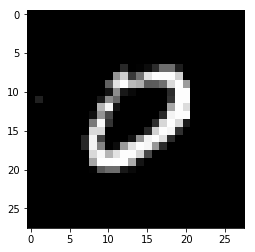

(array([0., 2., 4., 9.]), array([1, 1, 2, 3]))
9


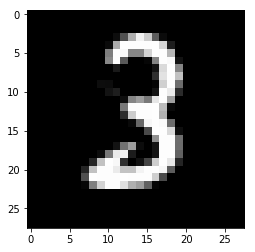

(array([3.]), array([7]))
3


In [724]:
for i in range(5):
    plt.imshow(tdf[i].reshape(28,28), cmap = 'gray')
    plt.show()
    print(mnist_knn(X,Y,tdf[i]))
#Argument 1 is the pixel matrix (0 - 783)
#Argument 2 is the label matrix (0 - 9)
#Argument 3 is the test matrix (0 - 783)


### Original Method XD
What I am trying to do here is add the corresponding mean values of a number matrix, i.e. the mean pixel values of each digit 1 - 9 
Then subtract the values from the test value 
The np.sum() will be lowest for the most similar number

In [426]:
#An empty array of size 10 X 784 for 784 values of each digit
sm = np.zeros((10,784))
print(sm.shape)
print(sm)
#a = np.random.randint(2,100,(1,784))
#sm[1] = sm[1] + a
#print(sm)
#print(a.shape)

(10, 784)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [427]:
#A dictionary for frequency of each digit by using the label matrix,Y
dgtfreq = {}
for i in Y:
    if dgtfreq.get(i) == None:
        dgtfreq[i] = 1
    else:
        dgtfreq[i] += 1
        
print(dgtfreq)
print(type(Y))
print(dgtfreq[2])

{1: 4684, 0: 4132, 4: 4072, 7: 4401, 3: 4351, 5: 3795, 8: 4063, 9: 4188, 2: 4177, 6: 4137}
<class 'numpy.ndarray'>
4177


In [428]:
sm[Y[1]]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [436]:
#Adding corresponding values to the empty matrix for case
for i in range(42000):
    #if the label is 0, then add values at row 0 and so on
    #print(sm[Y[i]])
    #print(X[i])
    sm[Y[i]] = sm[Y[i]] + X[i]
    #print(sm[Y[i]])
     
print(sm.shape)
    

(10, 784)


In [442]:
#Find the mean of the values by dividing each row with the corresponding values
for i in range(10):
    sm[i] = sm[i] / dgtfreq[i]
    
print(sm)

#The values don't seem to change but can be observed by using sm[i]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Now our testing matrix has been made, using which we will test each 784 values of the given test digit to predict the value. 
We will test by first plotting the number and then performing out prediction and verify both

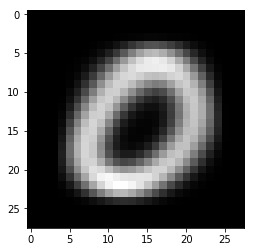

In [575]:
plt.imshow(sm[0].reshape(28,28), cmap = 'gray')
plt.show()

As you can see, the mean pixel values of all zeroes have been calculated and added to the sm matrix which gives a blurry digit

In [576]:
print(Y)

[1 0 1 ... 7 6 9]


Now, we will extract the digits from the test data

In [577]:
testdf = pd.read_csv('machine-learning-june-2019/Dataset/MNIST/test.csv')

In [578]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [579]:
testdf.head(n = 5)
#print(testdf.shape)

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 784 columns]

In [580]:
testdf.values

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [591]:
tdf = np.array(testdf.values)
print(type(tdf))
print(tdf[0].shape)
print(tdf[:,0].shape)
print(tdf[0][1])

<class 'numpy.ndarray'>
(784,)
(28000,)
0


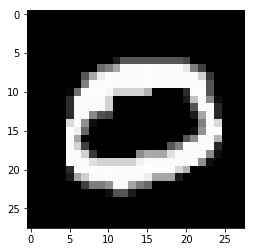

In [582]:
plt.imshow(tdf[1].reshape(28,28), cmap = "gray")
plt.show()

As you can see the digits from the test data have been extracted

In [583]:
#Write a function to find the difference in pixel values and add them
#sum_diff = 0;
def diffsum(X, Y):
    sum_diff = 0;
    for i in range(784):   
        sum_diff = sum_diff + abs(X[i] - Y[i])
    return sum_diff        

In [584]:
diffsum(sm[0],tdf[1])

39932.99999807638

[39932.99999807638, 39933.000000043896, 39932.99999984131, 39932.99999988402, 39933.000000190375, 39932.99999927696, 39932.99999981618, 39932.99999968374, 39932.99999980836, 39932.99999992789]


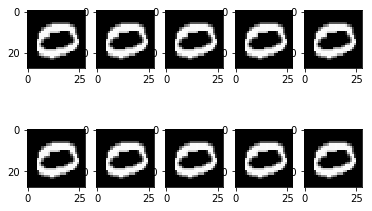

In [585]:
min_value = []
for i in range(10):
    min_value.append(diffsum(sm[i],tdf[1]))
    plt.subplot(2,5,i+1)
    plt.imshow((tdf[1]).reshape(28,28),cmap = 'gray')
    
print(min_value)
plt.show()

(784,)
(784,)


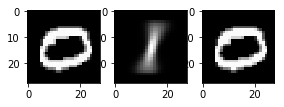

In [592]:
print(tdf[1].shape)
print(sm[1].shape)
plt.subplot(1,4,1)
plt.imshow(tdf[1].reshape(28,28),cmap = 'gray')
plt.subplot(1,4,2)
plt.imshow(sm[1].reshape(28,28),cmap = 'gray')
plt.subplot(1,4,3)
amt = tdf[1] - sm[0]
plt.imshow(amt.reshape(28,28),cmap = 'gray')
#plt.imshow(.reshape(28,28),cmap = 'gray')
plt.show()

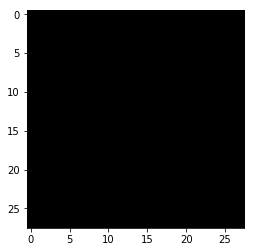

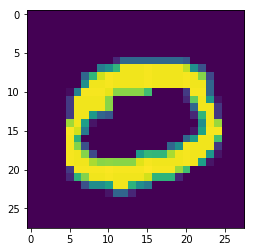

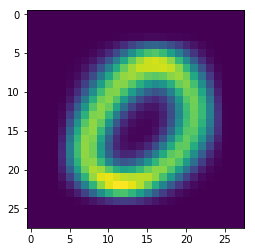

0
0
()
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  29
  85  85  85  85  85  85  85  85  71   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0 107 128 168 250 250 250 252 250 250 250 250
 231 127  63   0   0   0   0   0   0   0   0   0   0   0   0  85 168 237
 252 250 250 250 250 252 250 250 250 250 252

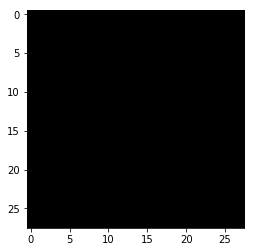

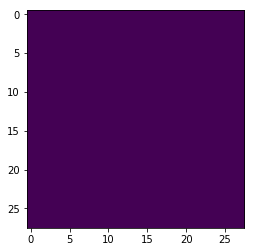

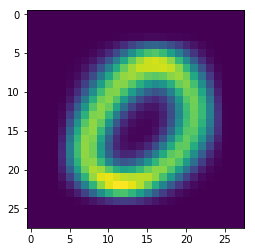

In [587]:

amt = np.zeros((1,784))
#for i in range(784):
#    amt[i] = tdf[1][i] 
plt.imshow(amt.reshape(28,28), cmap = 'gray')
plt.show()
plt.imshow(tdf[1].reshape(28,28))
plt.show()
plt.imshow(sm[0].reshape(28,28))
plt.show()
amt = tdf[1]*1
print(amt[0])
print(tdf[1][0])
print(amt[0].shape)
print(tdf[1])
for i in range(784):
    if sm[0][i] > 0:
        amt[i] = 0
        
#print(tdf[1][345])
#print(sm[0][345])
print(sm)        
#print(amt)
plt.imshow(amt.reshape(28,28), cmap = 'gray')
plt.show()
plt.imshow(tdf[1].reshape(28,28))
plt.show()
plt.imshow(sm[0].reshape(28,28))
plt.show()

In [448]:
a = 2
b = 24
abs(a-b)

22

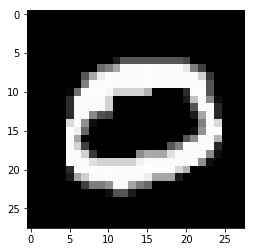

In [446]:
plt.imshow(tdf[1].reshape(28,28), cmap = 'gray')
plt.show()

In [345]:
sm = 0
for i in tdf[:,0]:
    sm +=1
    #drawing(X[i], Y[i], i+1)
#plt.show()
print(sm)

28000


In [305]:
test = np.array(X[0].reshape(28,28))
print(type(test))
print(test.shape)
#print(test)

<class 'numpy.ndarray'>
(28, 28)


In [314]:
np.sum(test - (X[1].reshape(28,28)))

0

In [317]:
for X in

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.46996754e-12
 6.75124460e-12 3.21095780e-12 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.95878428e-13
 2.74440837e-13 0.00000000e+00 2.33274712e-12 5.48881675e-12
 1.20753968e-12 0.000000

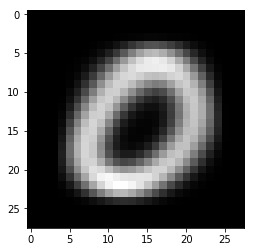

In [610]:
print(sm[0])
plt.imshow(sm[0].reshape(28,28), cmap = 'gray')
plt.show()

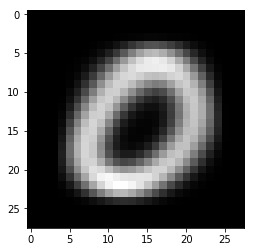

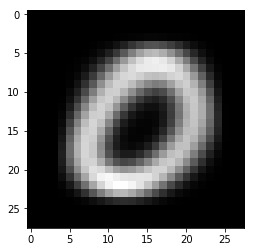

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.46996754e-12
 6.75124460e-12 3.21095780e-12 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 7.95878428e-13
 2.74440837e-13 0.00000000e+00 2.33274712e-12 5.48881675e-12
 1.20753968e-12 0.000000

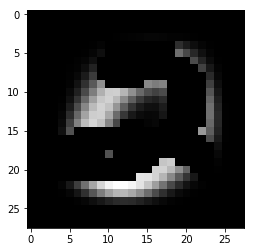

------
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.49013106e-12 4.20477695e-12
 6.31547526e-13 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0

In [613]:
# 1. Copy the contents of the test digit

amt = np.zeros((1,784)) # Empty matrix

#-- The original matrix- -
#plt.imshow(tdf[4].reshape(28,28), cmap = 'gray')
plt.imshow(sm[0].reshape(28,28), cmap = 'gray')
plt.show()

amt = sm[0]*1 #Copying contents and multiplying with 1 to prevent referencing

#-- The copied matrix- -
plt.imshow(amt.reshape(28,28), cmap = 'gray')
plt.show()

# 2. Modify the copied contents using the mean matrix
print(amt)

for i in range(784):
    if tdf[0][i] > 0.5:  #If there is some pixel value,i.e., some part of the digit is present
        amt[i] = int(0.0)   #Then remove that from the pixel value of copied matrix
        
# 3. Plot the final modified matrix

plt.imshow(amt.reshape(28,28), cmap = 'gray')
plt.show()

print("------")
print(sm[1])
print("------")
print(amt)

In [614]:
#Sum of the now reduced values
np.sum(amt)

1.415197895776476e-06

Now we will automate his task of checking with each row of sm matrix

In [695]:
def check_sim(index):
    val_min = []
    amt = np.zeros((1,784)) # Empty matrix
    for i in range(10):
        amt = sm[i]*1 #Copying contents and multiplying with 1 to prevent referencing

        for k in range(784):
            if tdf[index][k] > 0.5:  #If there is some pixel value,i.e., some part of the digit is present
                amt[k] = int(0.0)   #Then remove that from the pixel value of copied matrix
        
        val_min.append(np.sum(amt))
        plt.subplot(2,5,i+1)
        plt.imshow(amt.reshape(28,28),cmap = 'gray')
    plt.show()    
    #print(check_sim())
    #print(np.argmin(check_sim()))
    or_value = []
    for m in range(10):
        or_value.append(np.sum(sm[m]))
    # --print(or_value)
    # --print(val_min)

    f_value = []
    for m in range(10):
        f_value.append(abs(or_value[m] - val_min[m]))

    # --print(f_value)
    #print(np.argmin(check_sim()))

    # --print(np.argmax(f_value))
    return print(np.argmax(f_value))

In [677]:
np.sum(sm[1])

1.1823695830715376e-06

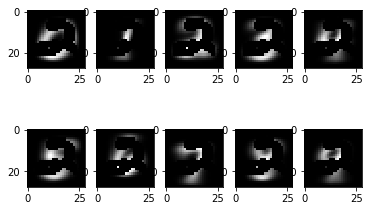

0


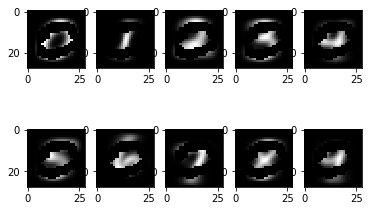

0


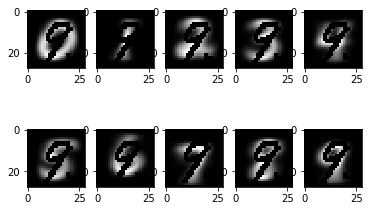

8


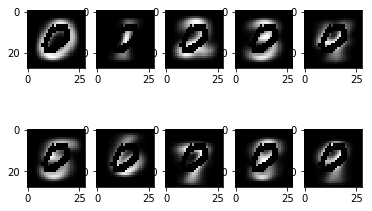

8


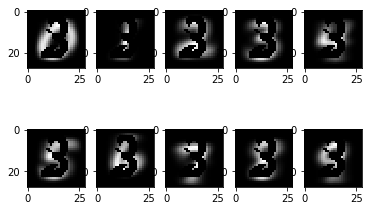

8


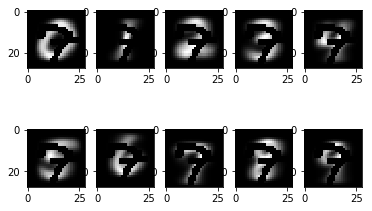

8


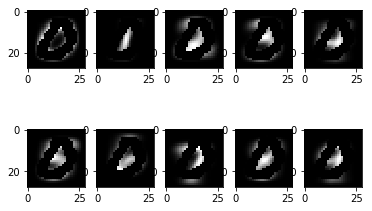

0


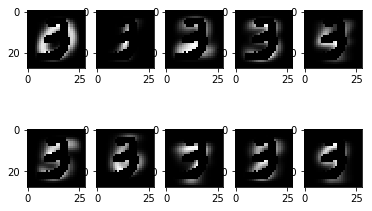

5


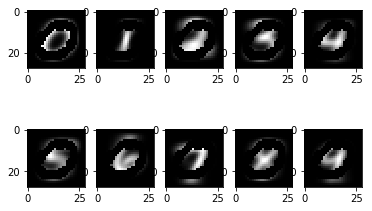

0


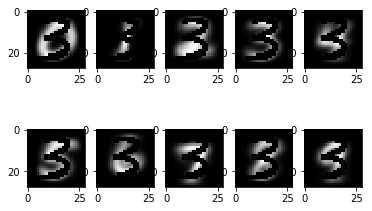

5


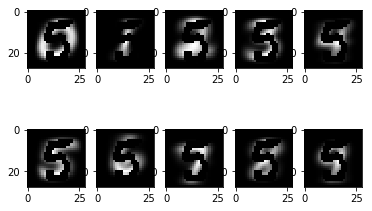

5


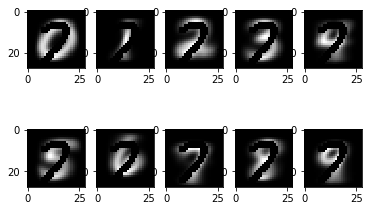

8


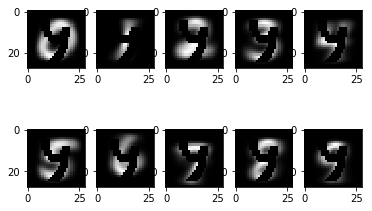

8


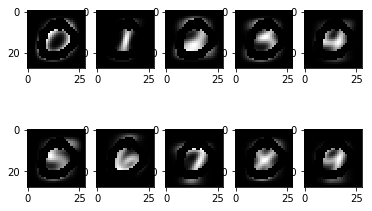

0


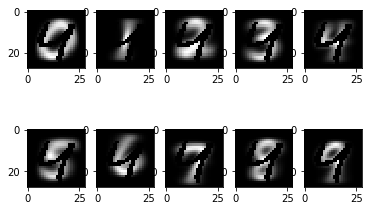

4


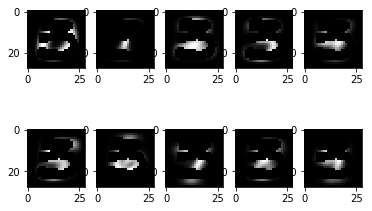

0


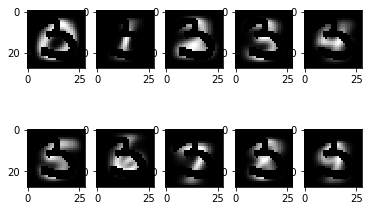

0


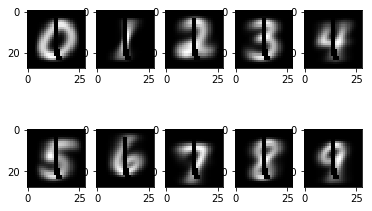

8


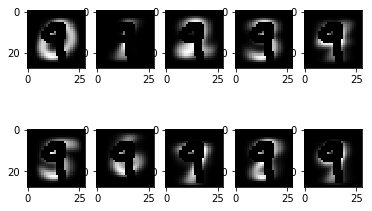

5


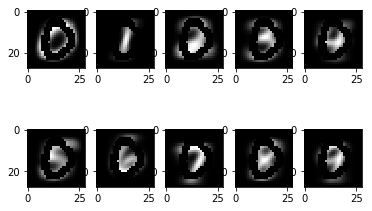

0


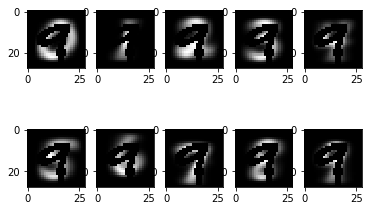

9


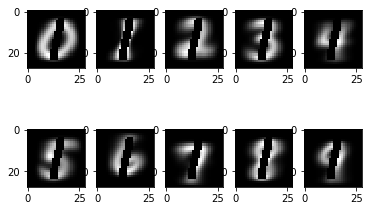

8


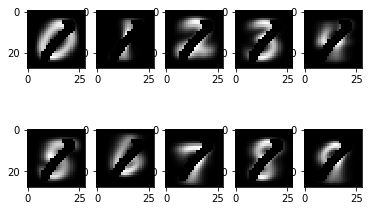

8


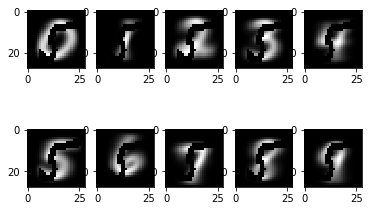

5


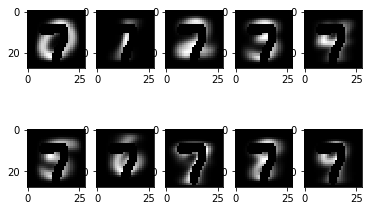

5


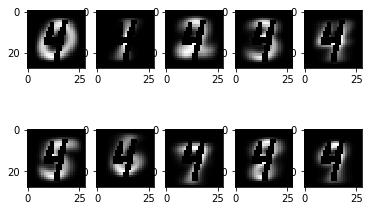

8


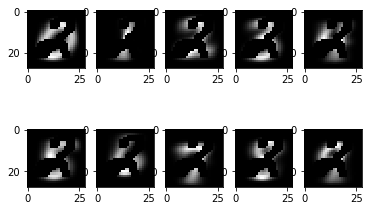

2


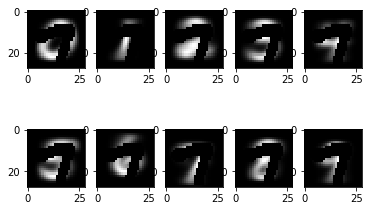

0


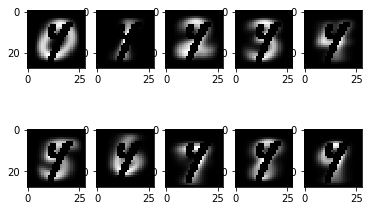

8


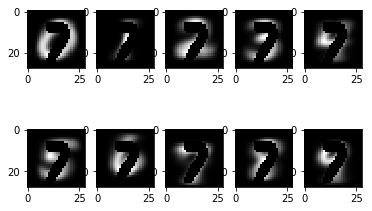

8


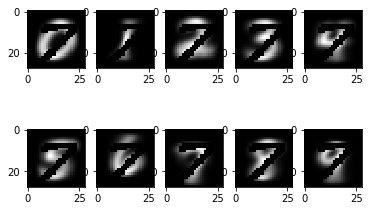

8


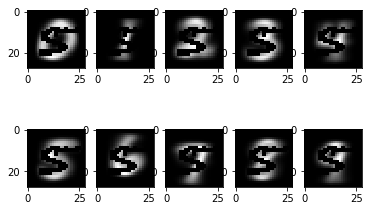

5


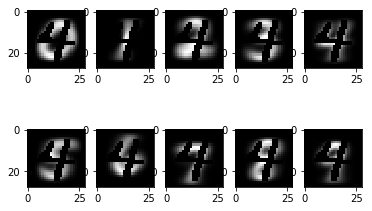

4


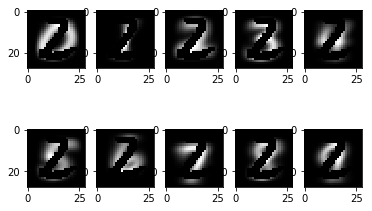

8


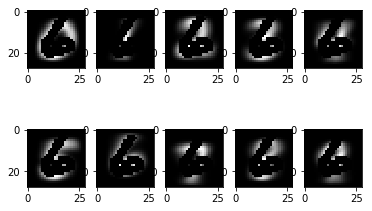

6


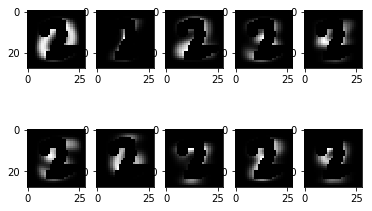

8


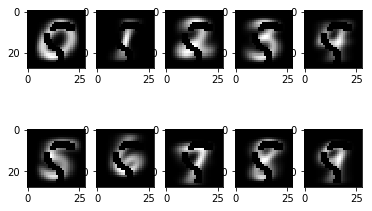

5


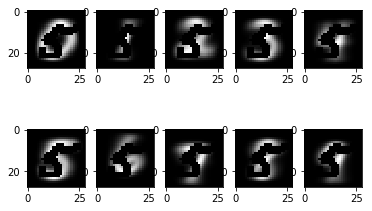

5


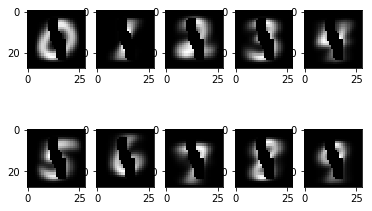

5


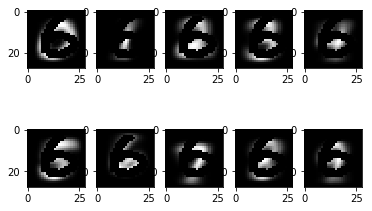

0


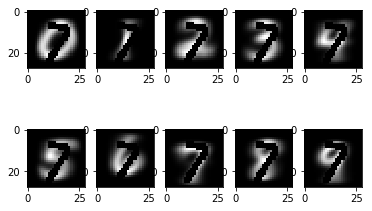

8


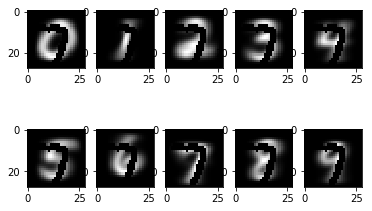

9


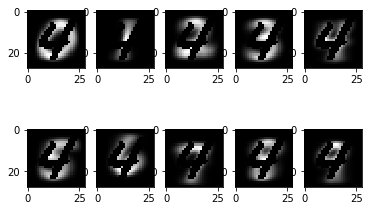

4


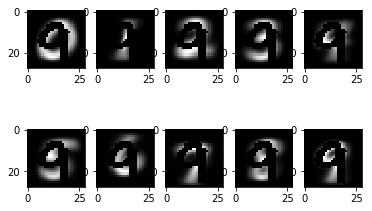

8


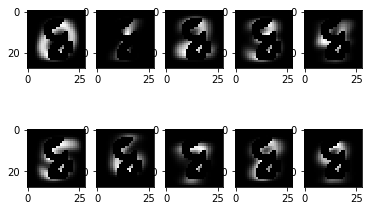

8


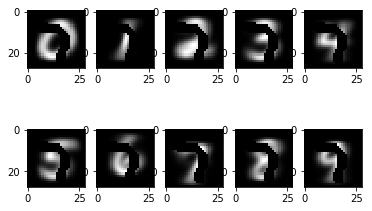

5


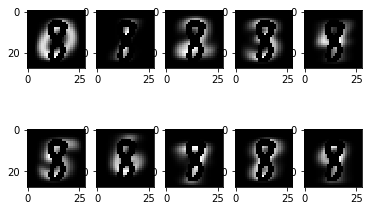

8


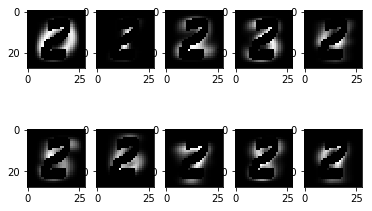

8


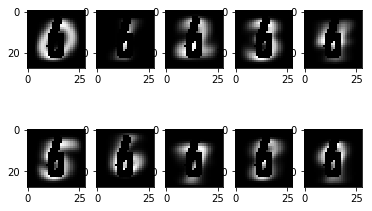

8


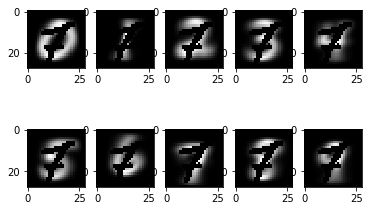

8


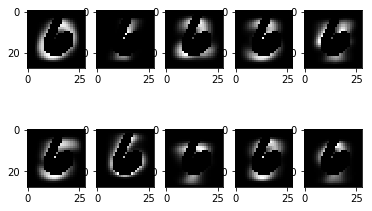

6


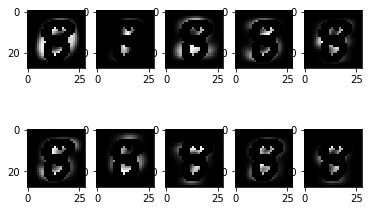

8


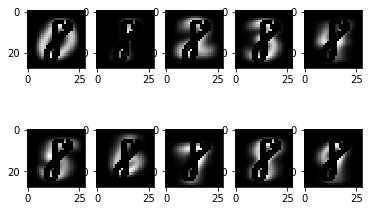

8


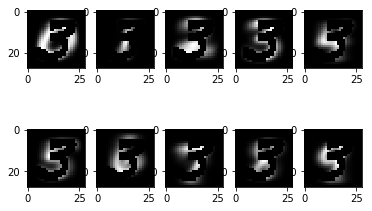

5


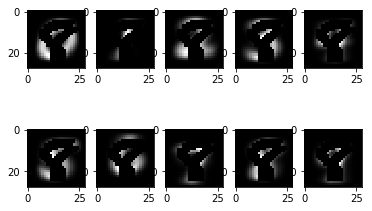

8


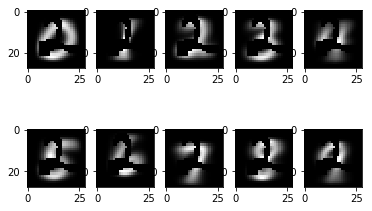

2


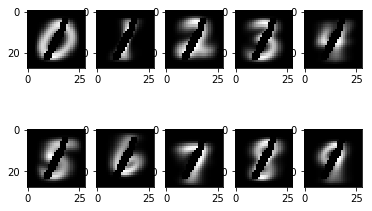

8


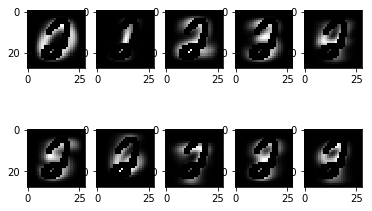

8


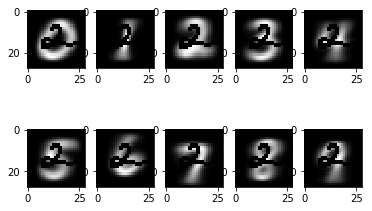

6


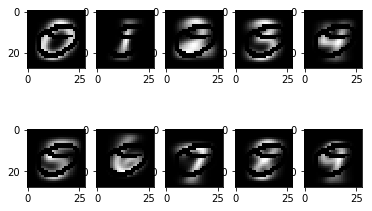

0


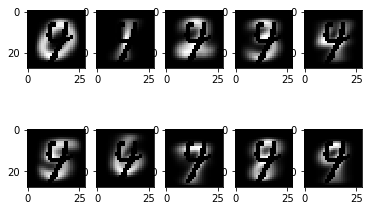

8


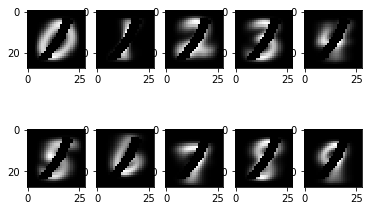

8


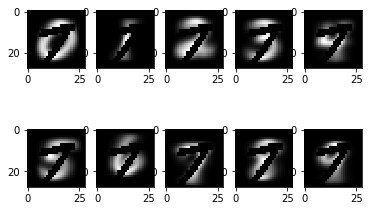

8


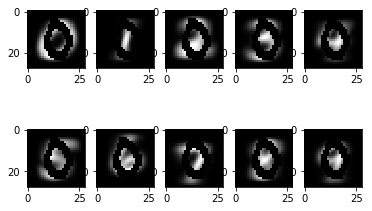

0


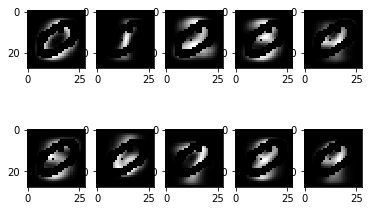

0


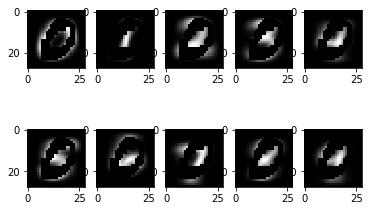

0


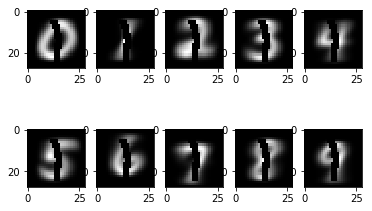

8


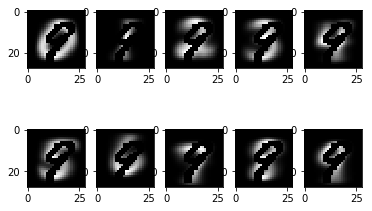

8


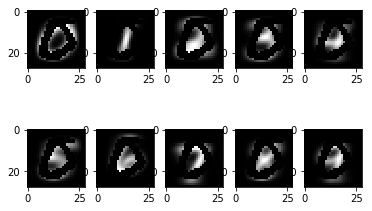

0


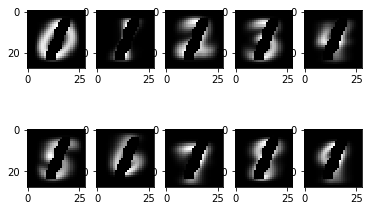

8


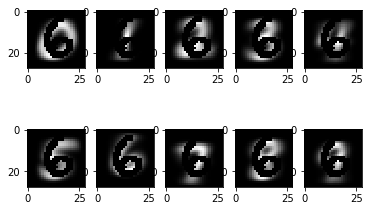

6


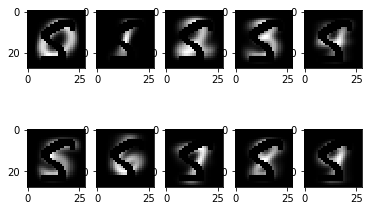

5


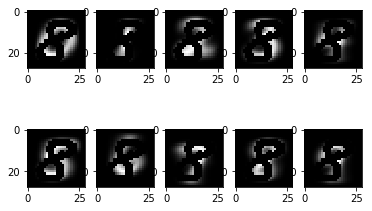

8


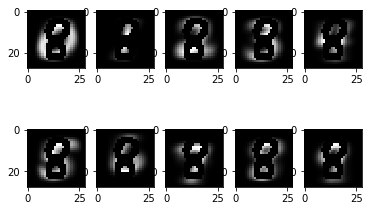

8


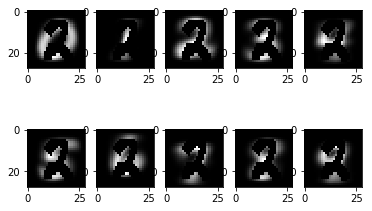

8


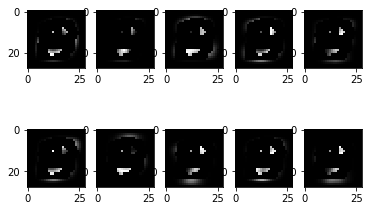

0


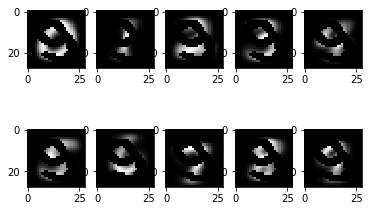

8


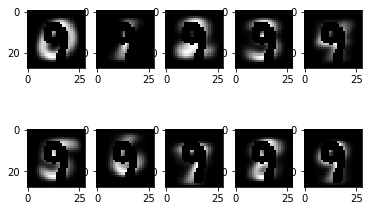

5


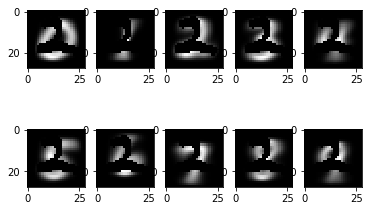

2


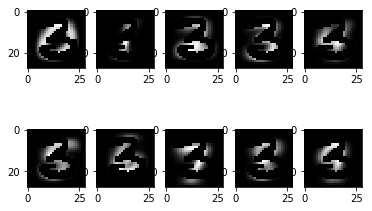

5


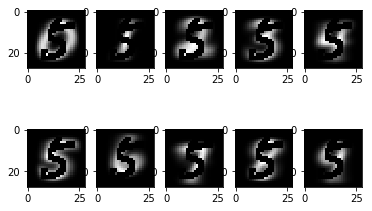

5


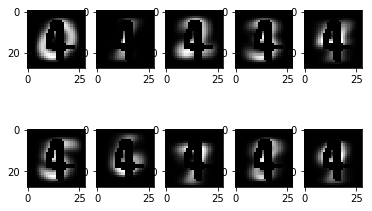

8


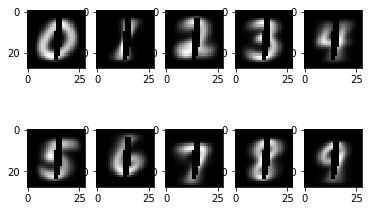

8


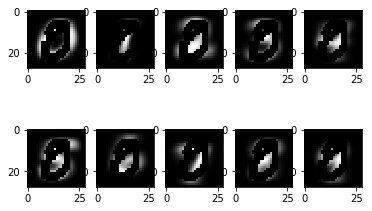

0


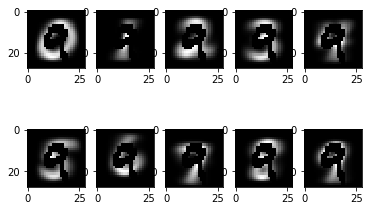

8


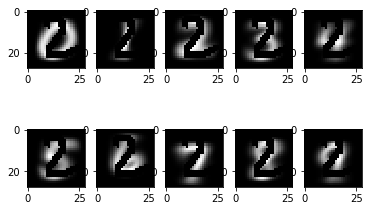

8


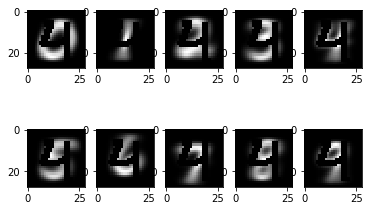

4


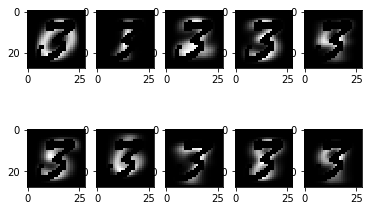

8


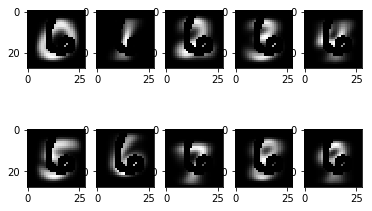

6


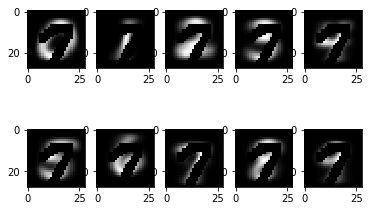

0


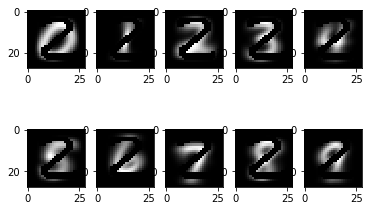

8


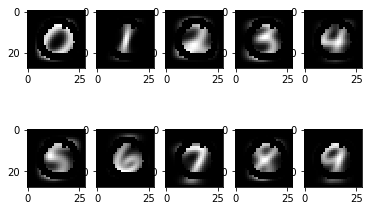

0


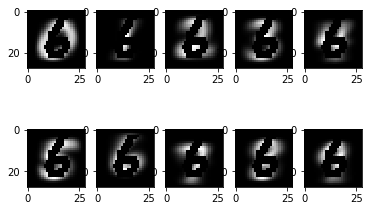

6


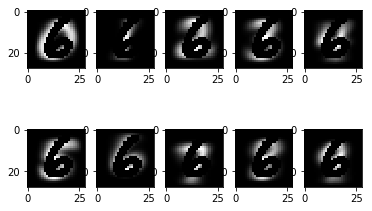

6


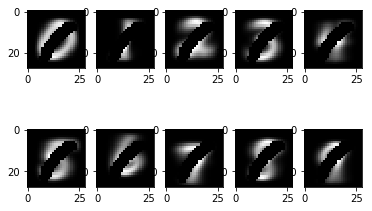

8


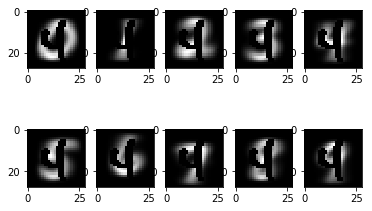

8


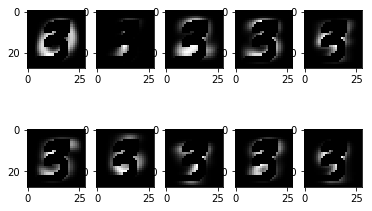

5


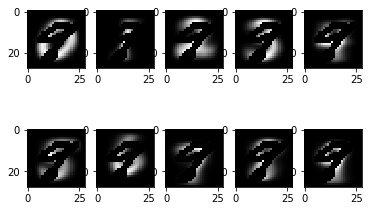

8


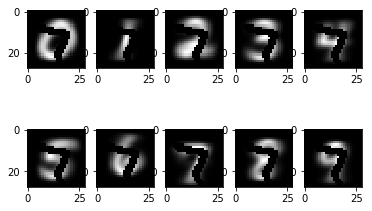

5


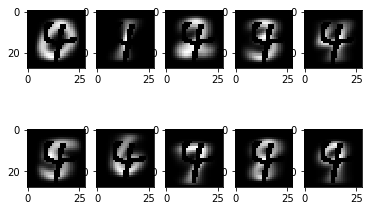

4


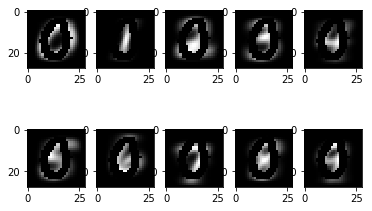

0


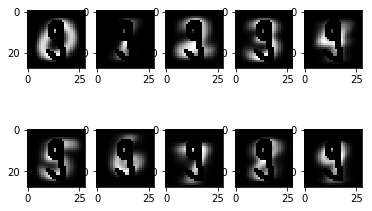

5


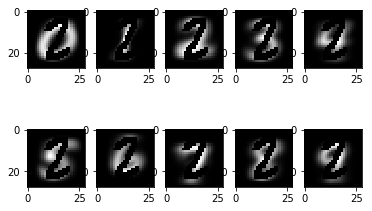

8


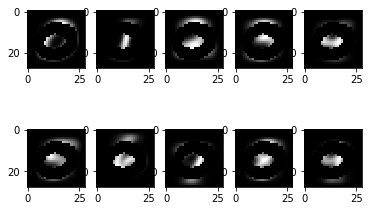

0


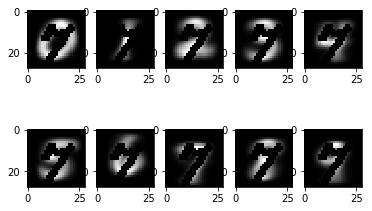

8


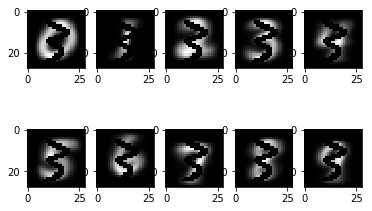

8


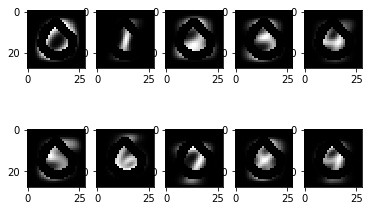

0


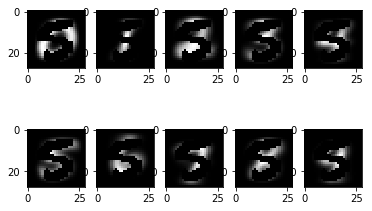

5


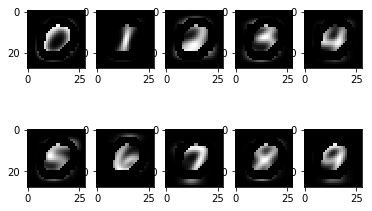

0


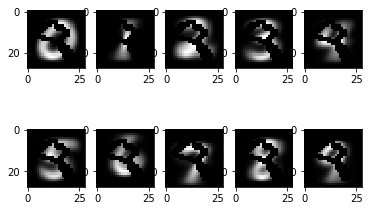

8


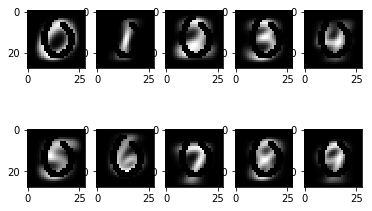

0


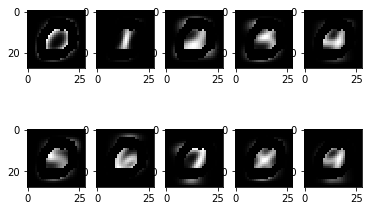

0


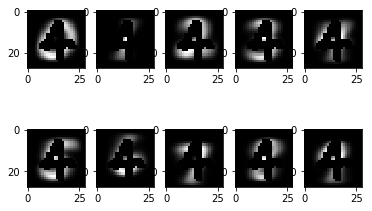

5


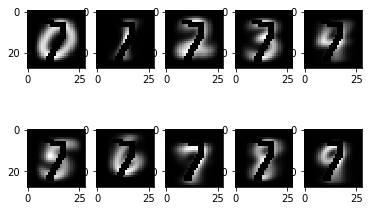

8


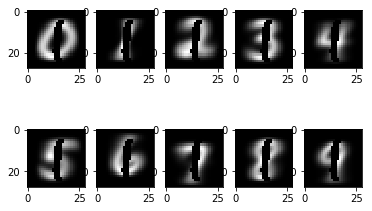

8


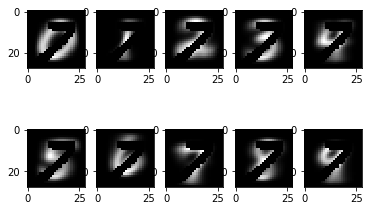

8


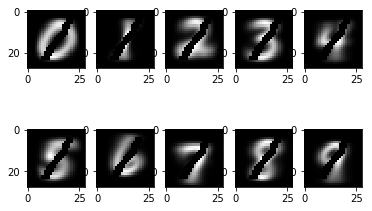

8


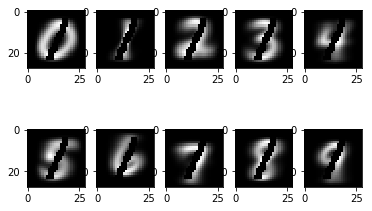

8


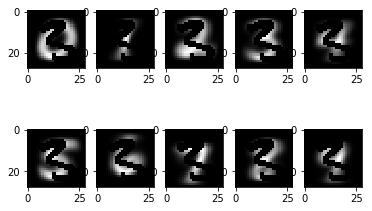

5


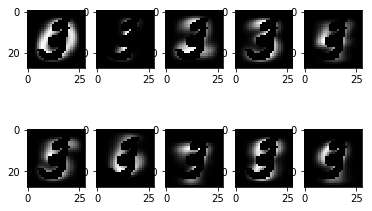

8


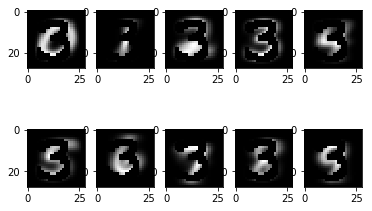

5


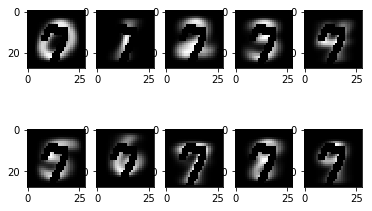

5


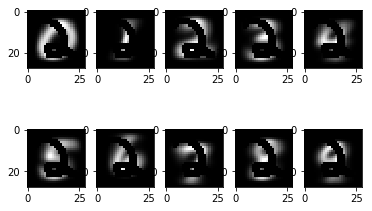

2


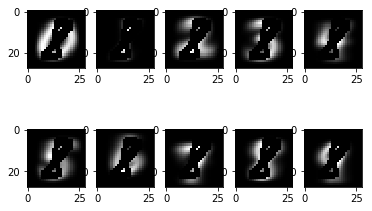

8


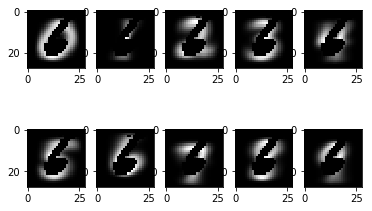

8


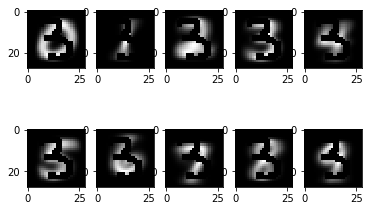

5


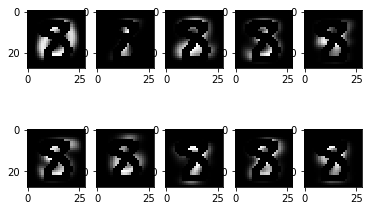

8


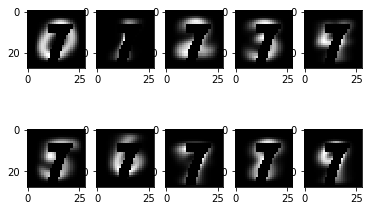

8


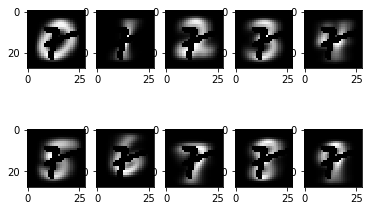

8


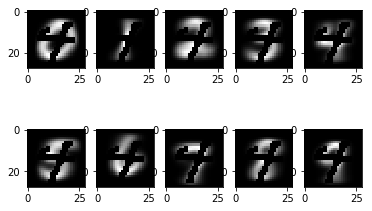

5


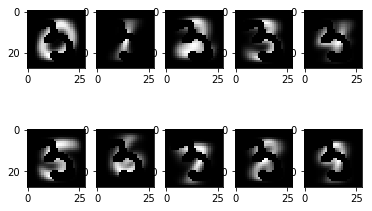

5


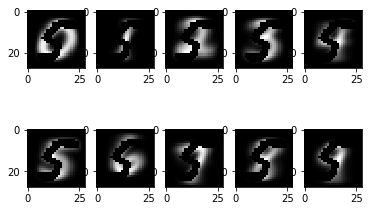

5


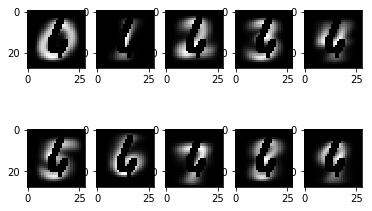

6


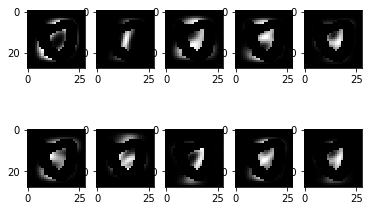

0


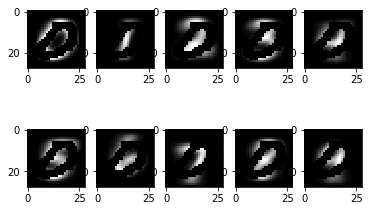

0


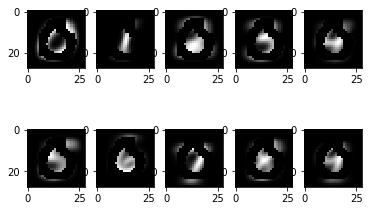

0


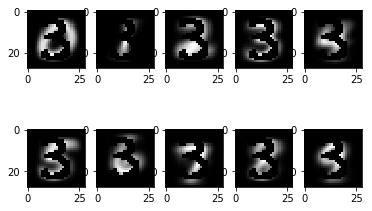

5


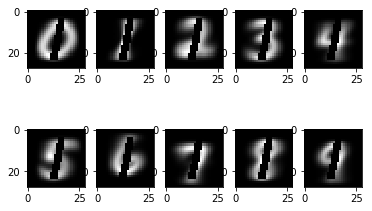

8


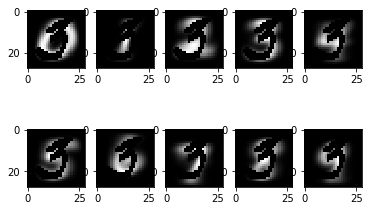

5


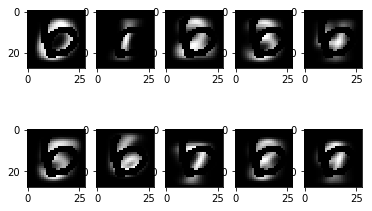

0


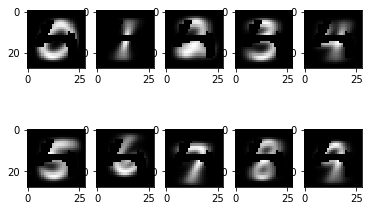

0


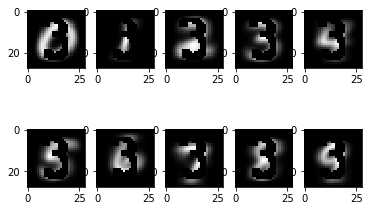

5


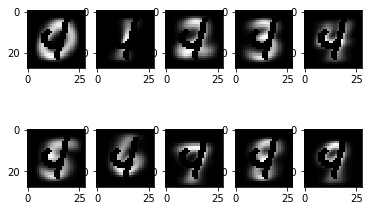

4


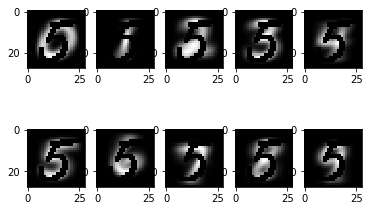

5


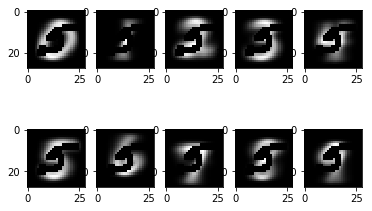

5


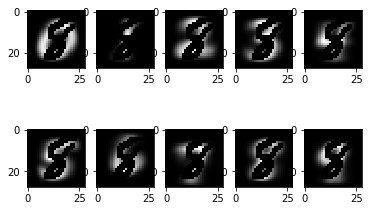

8


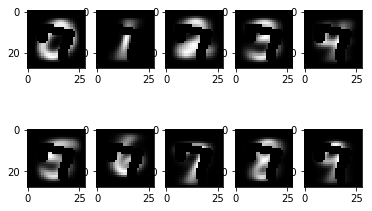

0


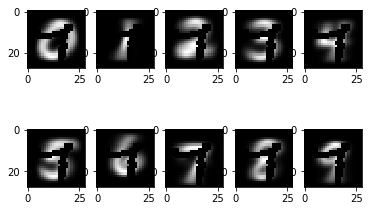

5


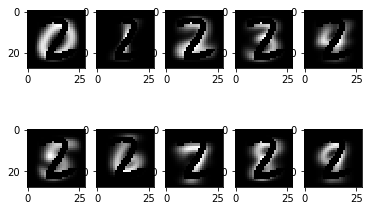

8


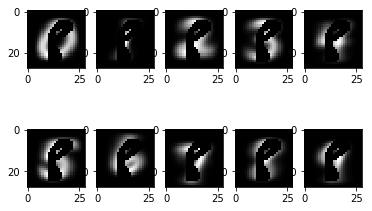

8


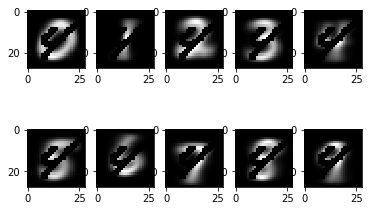

8


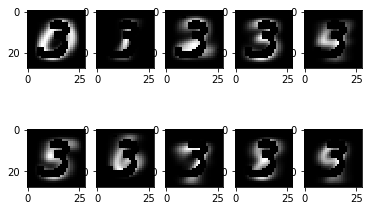

5


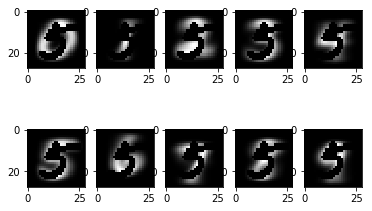

5


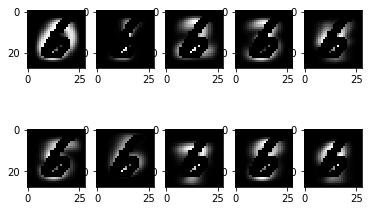

5


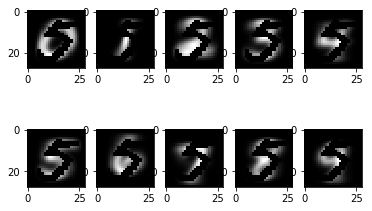

5


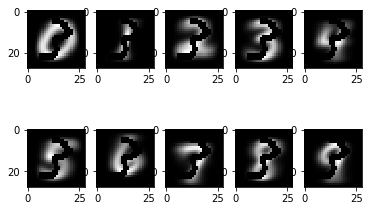

8


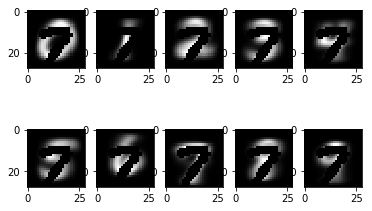

5


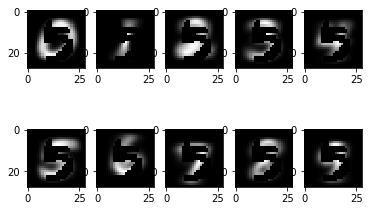

5


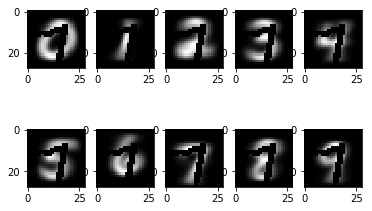

5


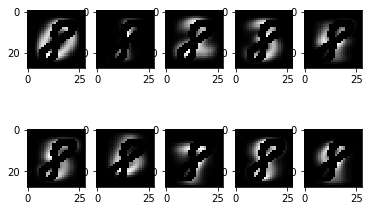

8


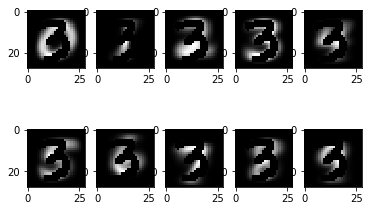

5


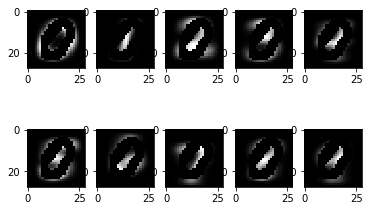

0


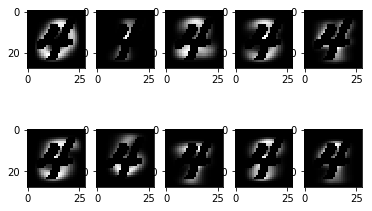

5


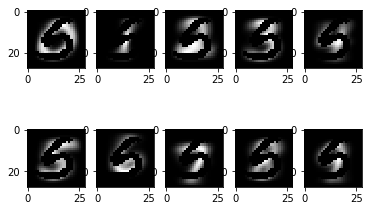

5


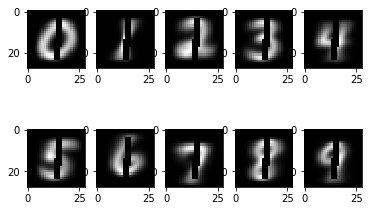

8


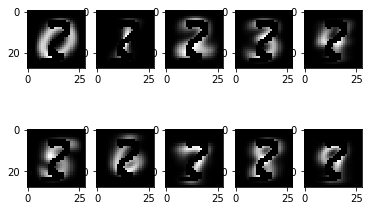

8


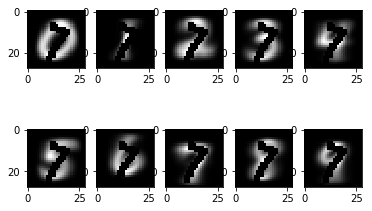

8


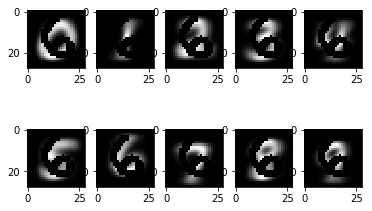

6


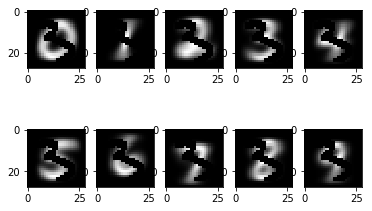

5


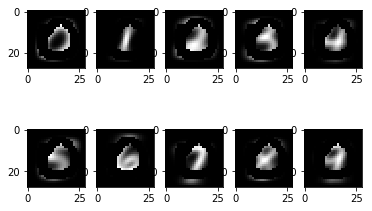

0


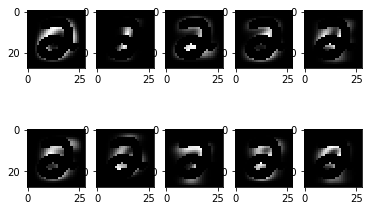

0


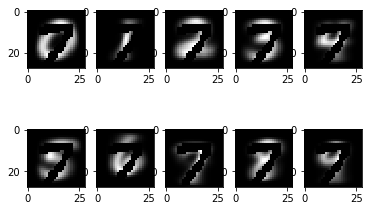

0


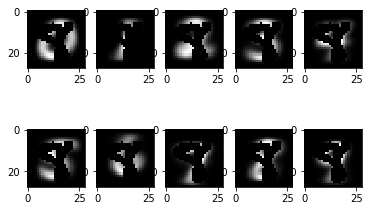

5


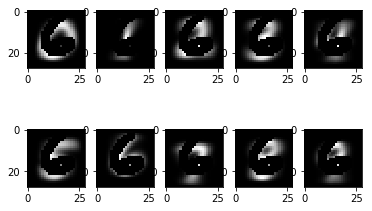

6


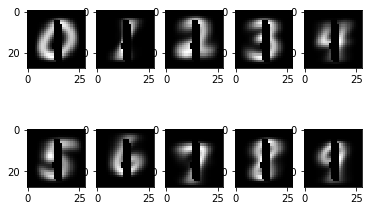

8


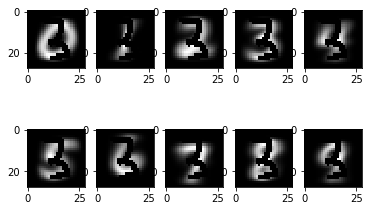

8


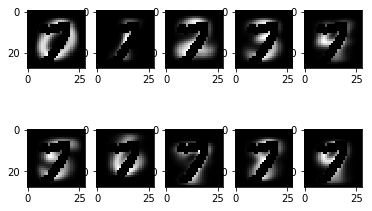

8


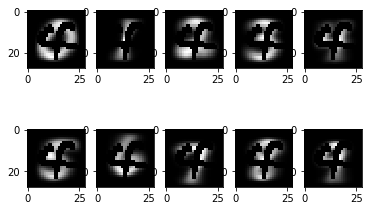

4


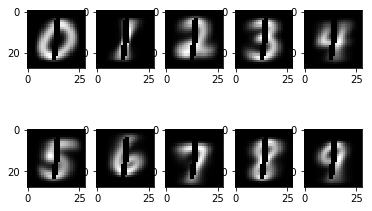

8


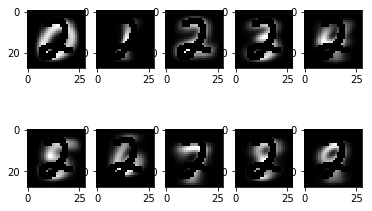

2


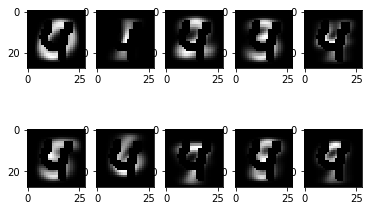

4


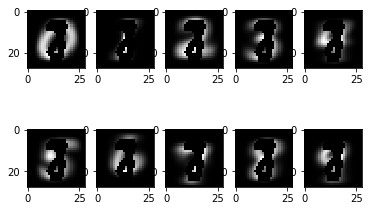

8


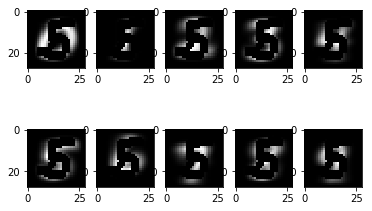

5


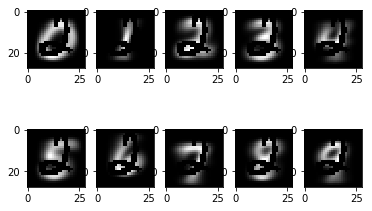

2


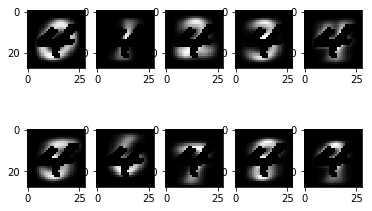

4


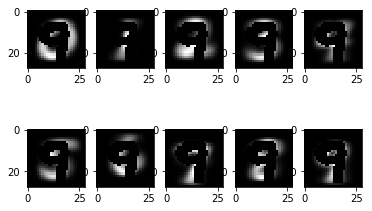

5


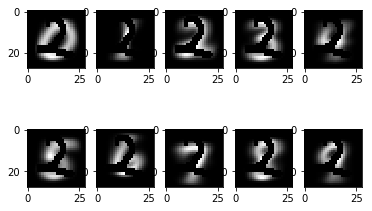

2


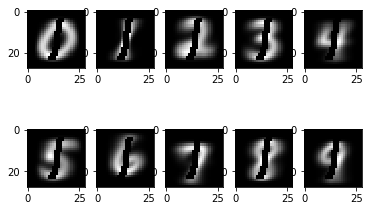

8


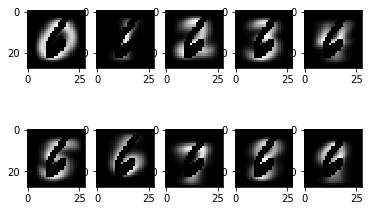

6


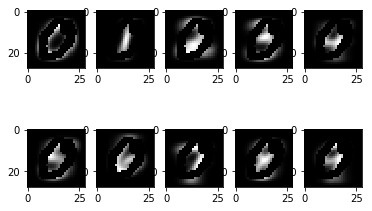

0


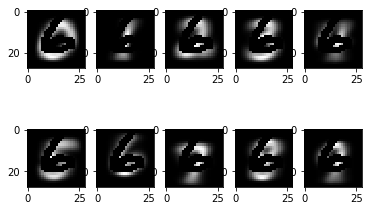

6


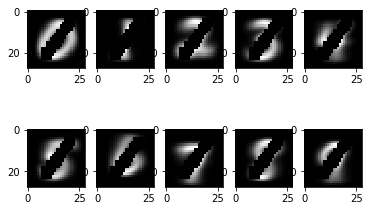

8


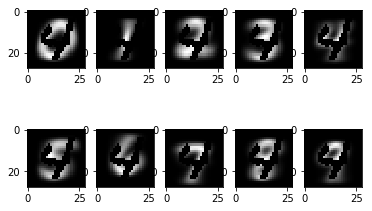

4


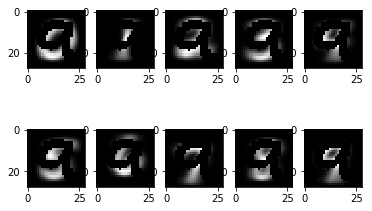

0


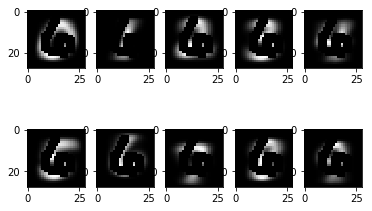

6


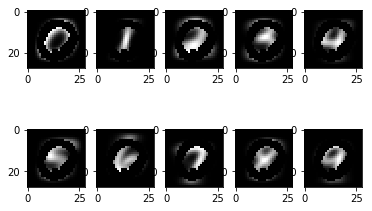

0


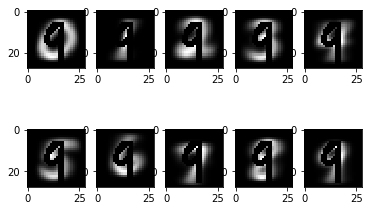

8


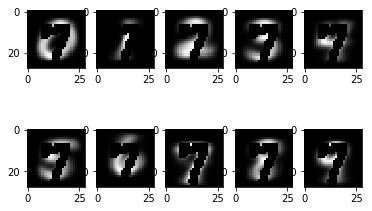

5


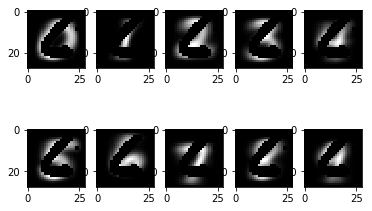

5


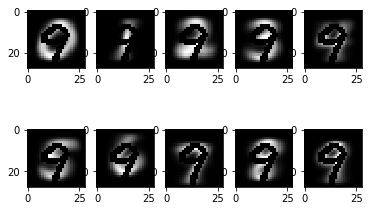

9


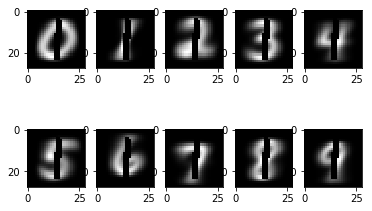

8


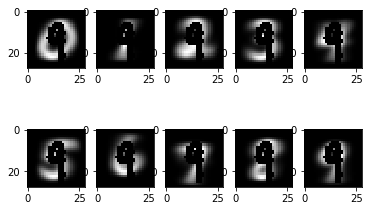

5


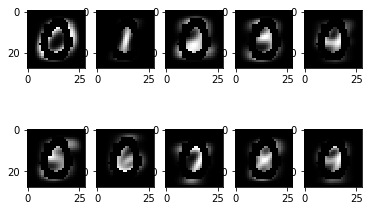

0


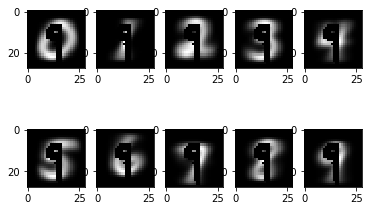

5


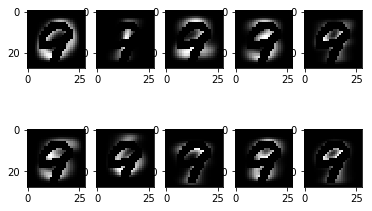

8


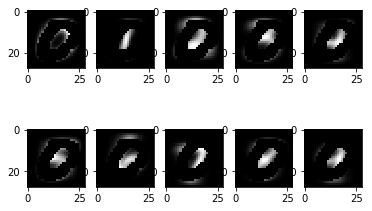

0


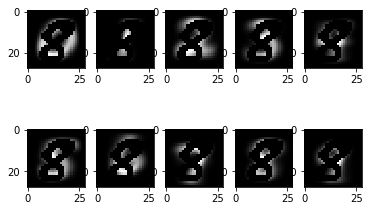

8


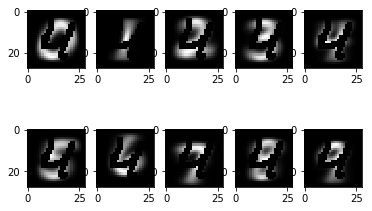

4


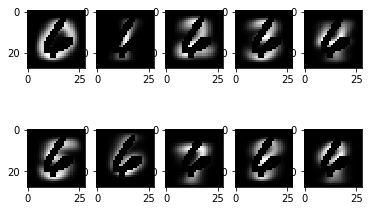

6


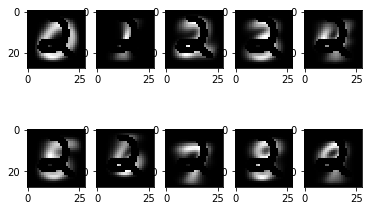

2


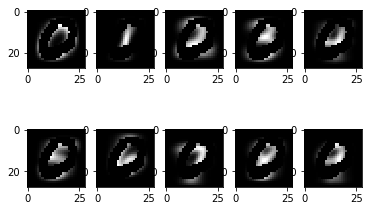

0


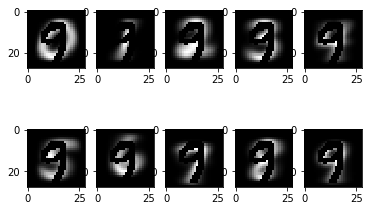

5


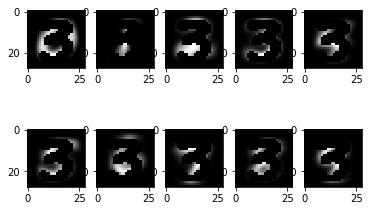

5


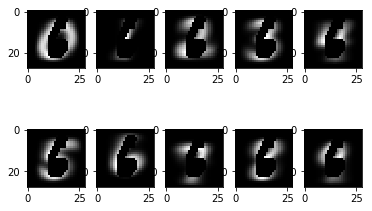

5


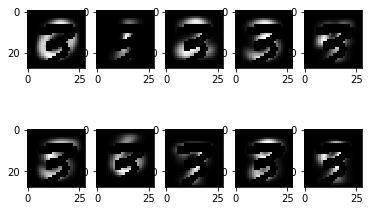

8


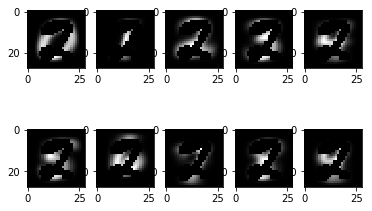

8


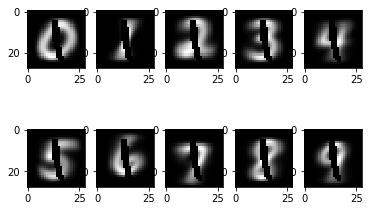

8


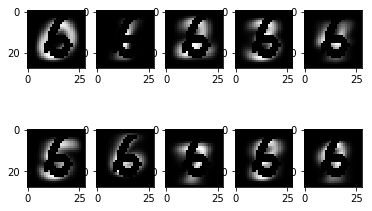

6


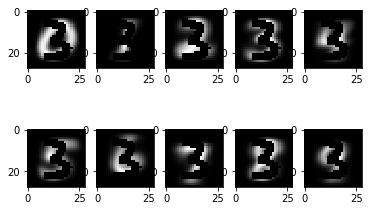

5


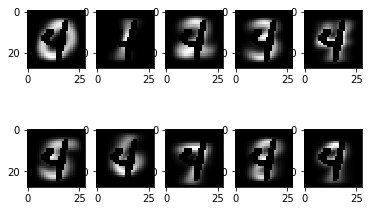

4


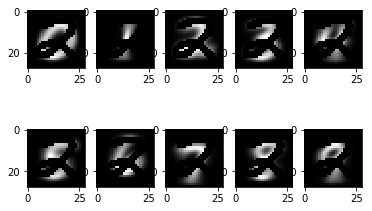

2


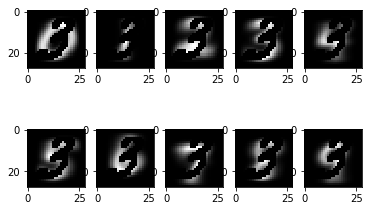

5


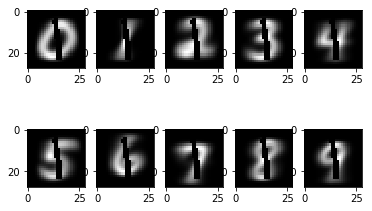

8


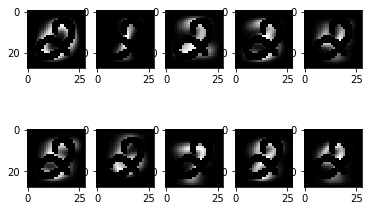

0


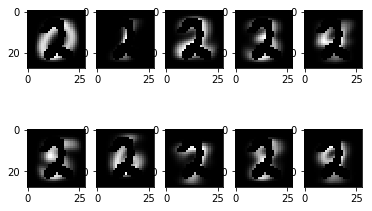

2


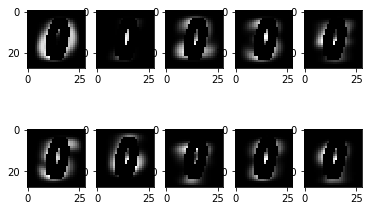

8


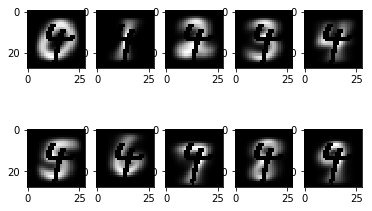

8


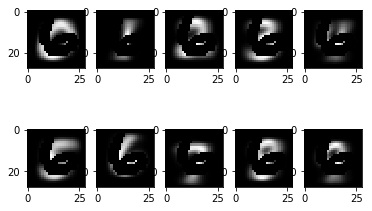

6


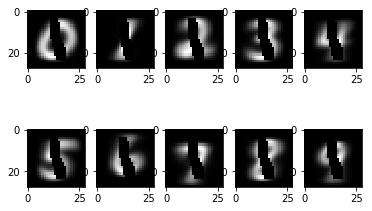

5


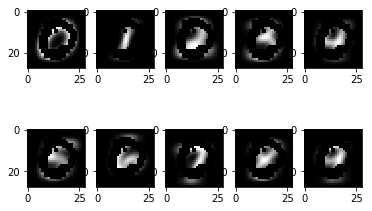

0


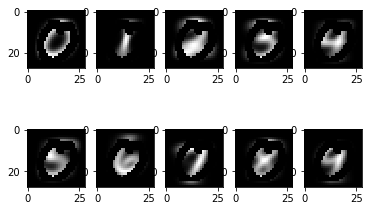

0


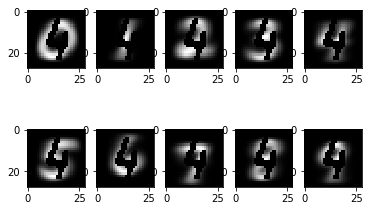

8


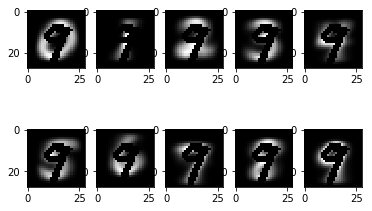

8


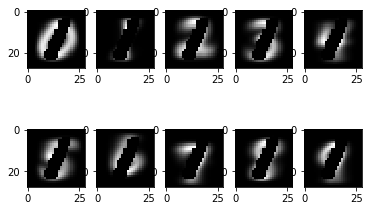

8


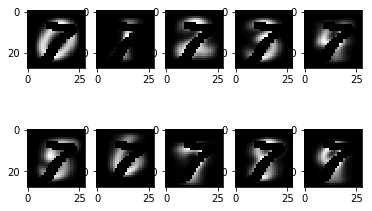

8


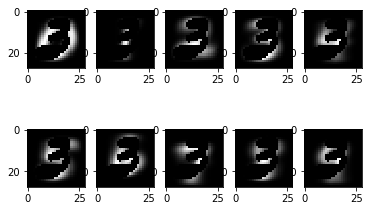

8


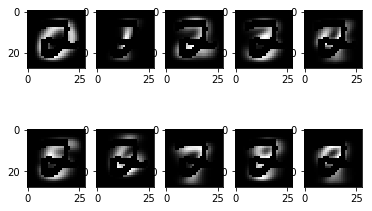

2


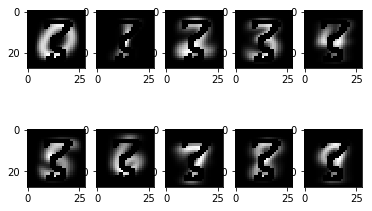

8


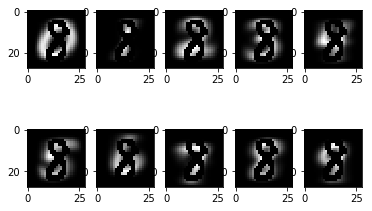

8


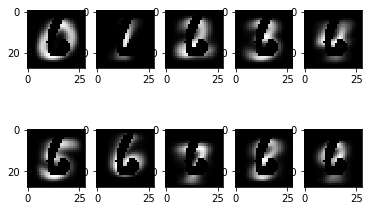

6


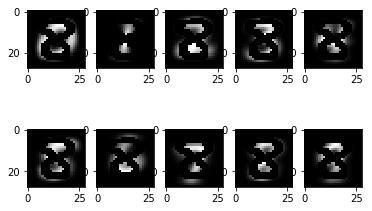

8


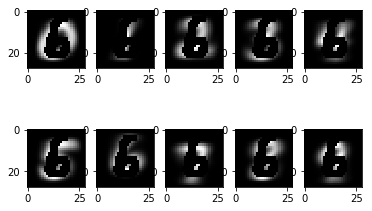

6


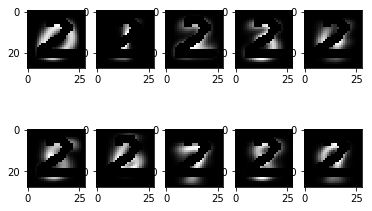

2


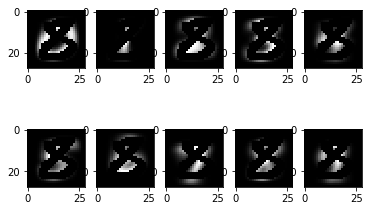

5


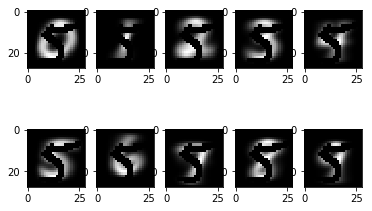

5


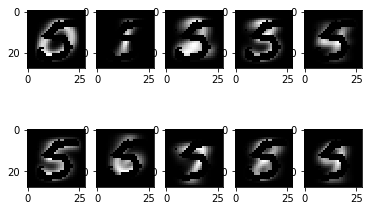

5


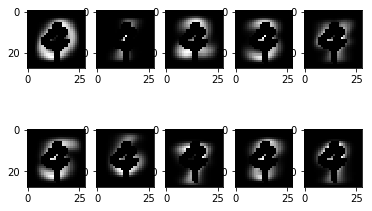

8


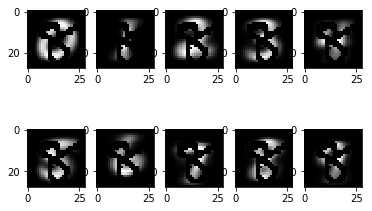

8


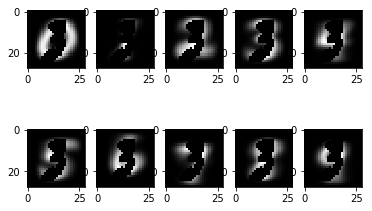

8


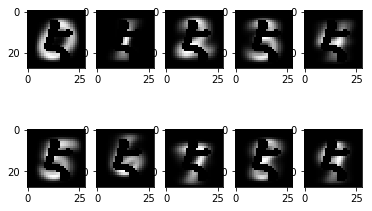

8


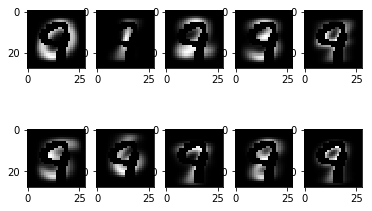

4


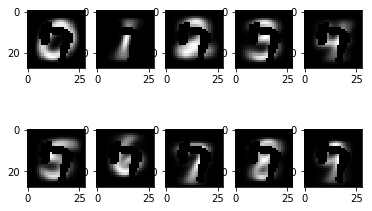

0


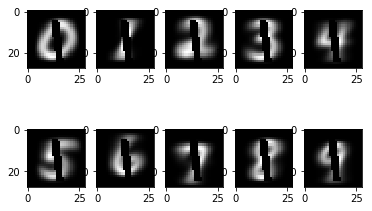

8


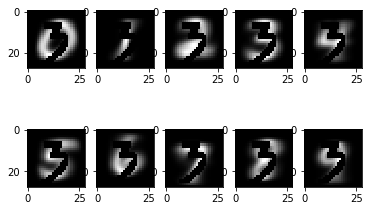

5


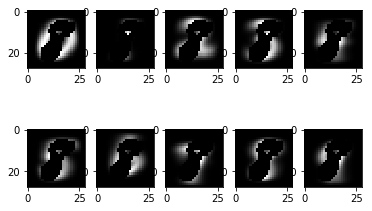

8


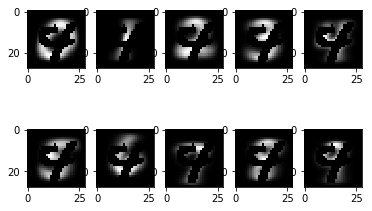

4


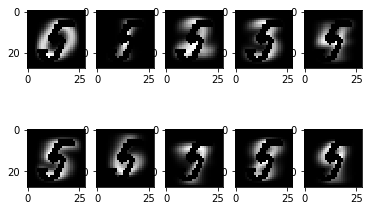

5


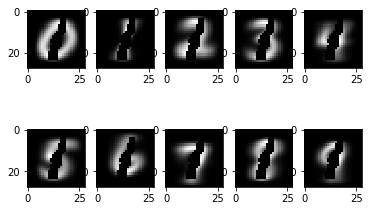

8


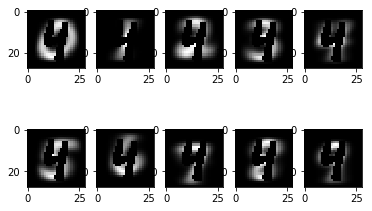

8


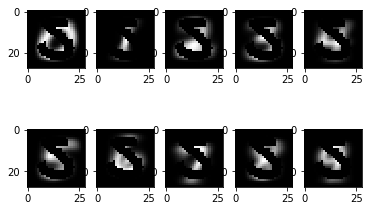

0


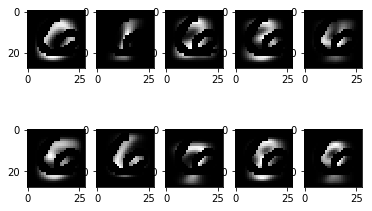

0


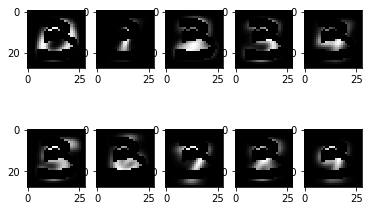

0


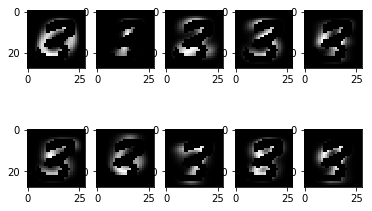

8


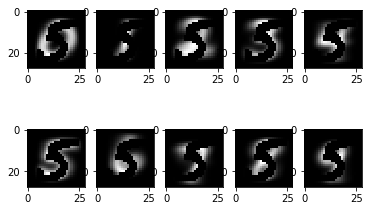

5


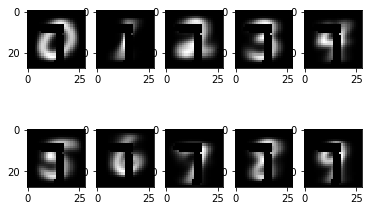

5


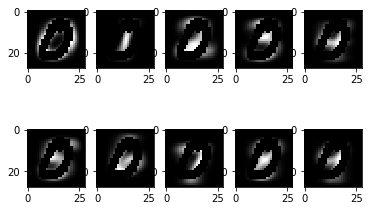

0


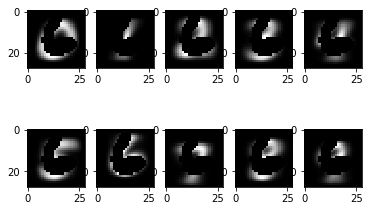

6


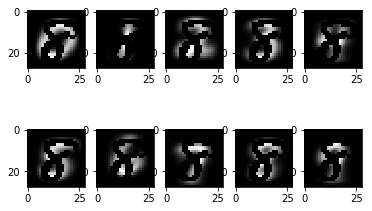

8


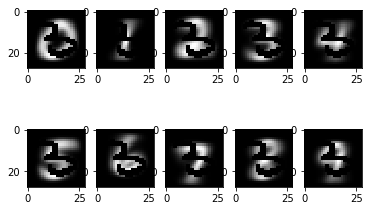

5


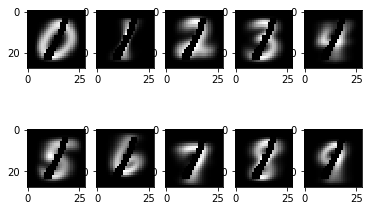

8


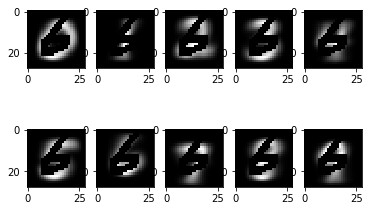

6


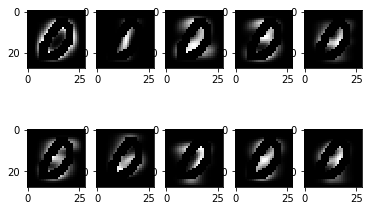

0


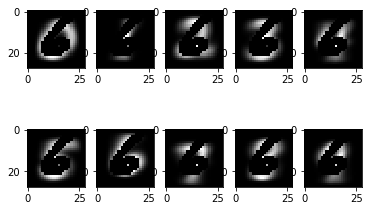

6


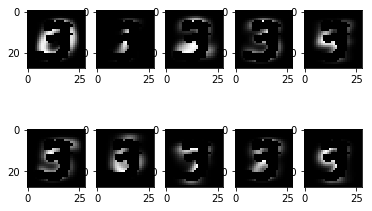

5


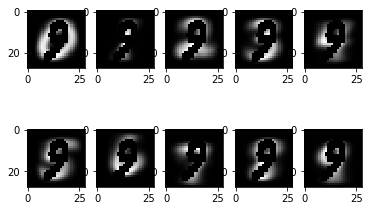

8


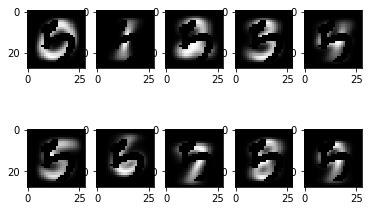

8


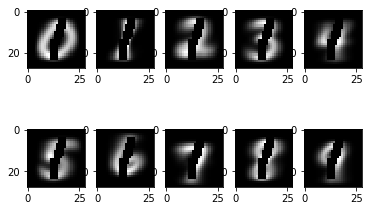

8


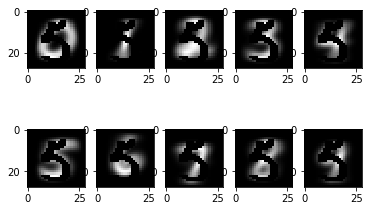

5


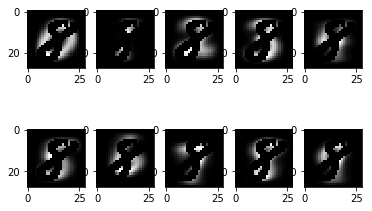

8


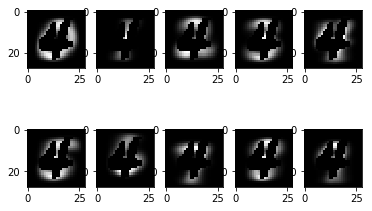

8


In [696]:
ans = []
for q in range(280):
    value = check_sim(q)
    #plt.imshow(tdf[q].reshape(28,28), cmap = 'gray')
    #plt.show()
    ans.append(value)

In [690]:
print(ans)

[None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

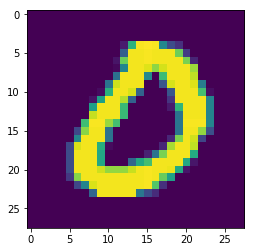

In [674]:
plt.imshow(tdf[6].reshape(28,28), cmap = 'gray')
plt.imshow(sm[0].reshape(28,28), cmap = 'gray')
plt.
plt.show()

In [694]:
checkpt = np.array([7,11])
#plt.imshow(checkpt)
#plt.show()
plt.scatter(tdf[6],tdf[])
plt.show()

TypeError: scatter() missing 1 required positional argument: 'y'